## Презентация

[**Презентация**](https://drive.google.com/file/d/1B1jQ7vY_yv6NR0gNcoF619jRY_tfI-cr/view?usp=sharing)

## Оглавление

**Исследование отточности клиентов**

**Цель исследования:**
- Выяснить природу пропусков данных в столбце balance
- Определить различия между отточными и неотточными пользователями
- Сформировать сегменты неотточных пользователей

**Задачи исследования:**

- Изучить корреляции пропусков с остальными метриками
- Заполнить пропуски релевантными значениями
- Рассмотреть данные в разбивке на отточных и неотточных пользователей
- Определить, по каким метрикам они различаются
- Выбрать диапазоны метрик с неотточными пользователями
- Сформировать из них сегменты

**Описание данных:**
- userid - уникальный ID юзера
- score - баллы кредитного скоринга 
- city - город пользователя
- gender - пол пользователя
- age - возраст пользователя
- equity - бальная оценка собственности юзера
- balance - баланс на счетах пользователя
- products - количество подключенных продуктов
- credit_card - есть ли у юзера кредиткая карта
- last_activity - был ли пользователь онлайн за ближайший месяц
- est_salary - приблизительная заработная плата юзера
- churn - указал ли пользователь, что хочет разорвать с нами отношения(отточность)

**Структура проекта**
- [Презентация](#Презентация)
---
- [Предобработка](#Предобработка)
---
- [Природа пропусков](#Природа-пропусков)
    - [Хитмэп](#Хитмэп)
    - [Приблизительная ЗП](#Приблизительная-ЗП)
    - [Кредитный скор](#Кредитный-скор)
    - [Количество продуктов](#количество-продуктов)
    - [Наличие кредитки](#Наличие-кредитки)
    - [Объекты в собственности](#Объекты-в-собственности)
    - [Недавняя активность](#Недавняя-активность)
    - [Возраст](#Возраст)
    - [Города](#Города)
    - [Пол](#Пол)
    - [Заполнение пропусков в балансе](#Заполнение-пропусков-в-балансе)
    - [Итог](#Итог)
---
- [Исследовательский анализ](#Исследовательский-анализ)
    - [Хитмэп](#Хитмэп-EDA)
    - [Приблизительная ЗП](#Приблизительная-ЗП-EDA)
    - [Кредитный скор](#Кредитный-скор-EDA)
    - [Количество продуктов](#количество-продуктов-EDA)
    - [Наличие кредитки](#Наличие-кредитки-EDA)
    - [Объекты в собственности](#Объекты-в-собственности-EDA)
    - [Недавняя активность](#Недавняя-активность-EDA)
    - [Возраст](#Возраст-EDA)
    - [Города](#Города-EDA)
    - [Пол](#Пол-EDA)
    - [Итог](#Итог-EDA)
---
- [Гипотезы](#Гипотезы) 
    - [Проверка приблизительной ЗП](#Проверка-приблизительной-ЗП)
    - [Проверка возрастов](#Проверка-возрастов)
---
- [Сегментация](#Сегментация)
    - [Сегмент A](#Сегмент-A)
    - [Сегмент B](#Сегмент-B)
    - [Сегмент C](#Сегмент-D)
    - [Сегмент D](#Сегмент-D)
---
- [Итог](#Итог)

## Импорты и ознакомление с данными

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats as st

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
try:
    pd.read_csv("https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F")
except:
    pd.read_csv("https://disk.yandex.ru/d/dJt-j_GFaQ0sXQ")

In [4]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,"10,000.00","10,000.00","9,974.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.18,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


Данные в целом хорошего качества. В возрастах есть немного пропусков, с ними получится легко разобраться. Есть также пропуски в балансе, их много и просто так от них избавиться не получится при помощи медиан или средних.
Также надо будет привести столбцы к нижнему регистру и чуть изменить типы данных.

## Предобработка

In [7]:
# унификация названий колонок
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [8]:
# полных дубликатов в датафрейме нет и судя по данным, частичных тоже быть не должно.
df.duplicated().sum()

0

In [9]:
df.isna().sum()
# 26 пропусков возраста, это не страшно, думаю, вполне можно заполнить медианами.
# 2295 пропусков баланса - это уже подозрительно. Надо будет разобраться с этим подробнее. 
# просто заполнить их медианами будет некорректно. 
# пока мне видится неплохой идеей умножение медианы баланса на долю медианы salary от конкретной salary.

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [10]:
df['age'] = df['age'].fillna(df['age'].median())
# для пропусков в балансе придется сначала исследовать дф

In [11]:
# так будет удобнее
# скорринг как будто бы тоже представлен только целыми числами, но уверенности нет.
df['age'] = df['age'].astype('int')
df['age'].head()

0    25
1    37
2    30
3    51
4    34
Name: age, dtype: int32

In [12]:
df['na_balance'] = df['balance'].isna() * 1
df['na_balance'].head()

0    0
1    0
2    1
3    0
4    0
Name: na_balance, dtype: int32

In [13]:
# всего в ДФ 3 города, по каждому можно будет провести отдельную проверку(или нет)
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [14]:
# не пригодилось
#df['ribinsk'] = [1 if i == 'Рыбинск' else 0 for i in df['city']]
#df['yaroslavl'] = [1 if i == 'Ярославль' else 0 for i in df['city']]
#df['rostov'] = [1 if i == 'Ростов' else 0 for i in df['city']]
#df['ribinsk'].head()

**Предобработка:**

Пропуски в балансе заполнить пока не представляется возможным, имеет смысл попробовать установить их природу и придумать формулу для заполнения, если выяснится, что их природа не случайно. В остальном же данные приобрели удобоваримый вид.

## Природа пропусков

In [15]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")


### Хитмэп

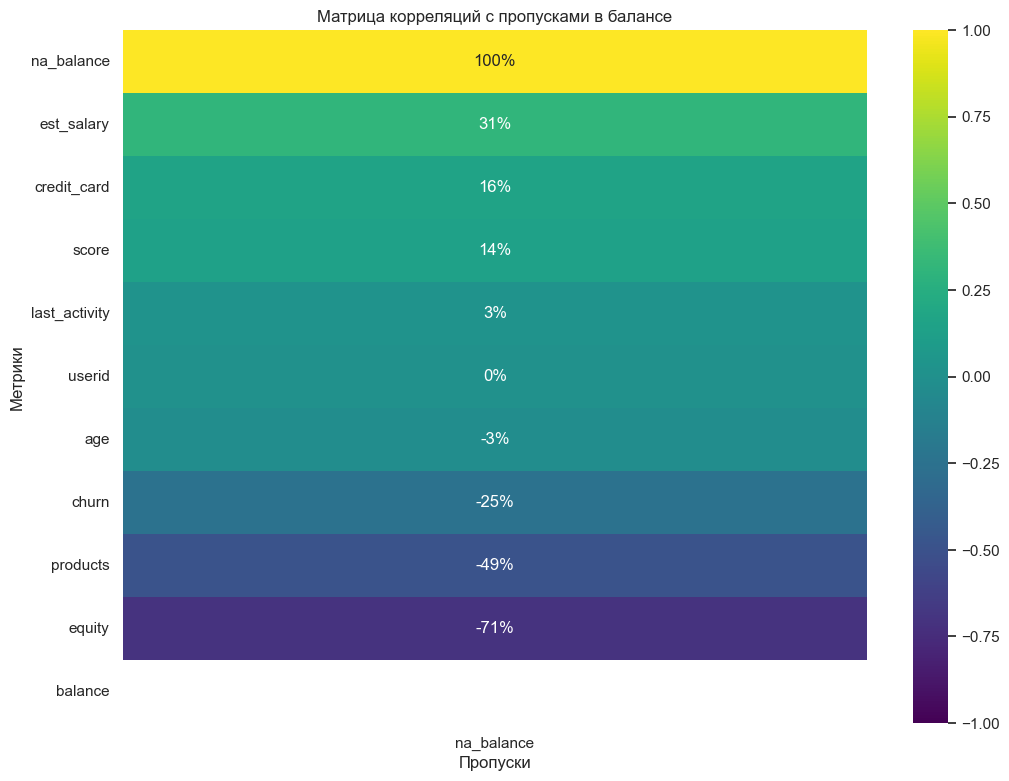

In [16]:
heatmap = sns.heatmap(df.corr()[['na_balance']].sort_values(by='na_balance', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='viridis', 
                      fmt=".0%", 
                      center=0)
heatmap.set(title='Матрица корреляций с пропусками в балансе',
            xlabel='Пропуски', ylabel='Метрики');

На хитмэпе видна очень сильная корреляция с баллами собственности, она явно не случайна. Также сильная корреляция наблюдается с количеством подключенных продуктов и с приблизительной ЗП, но заметно меньше "основной метрики". Так или иначе, имеет смысл проверить все из них, вполне возможно распределения покажут что-то, что не видно на хитмэпе. 

### Приблизительная ЗП

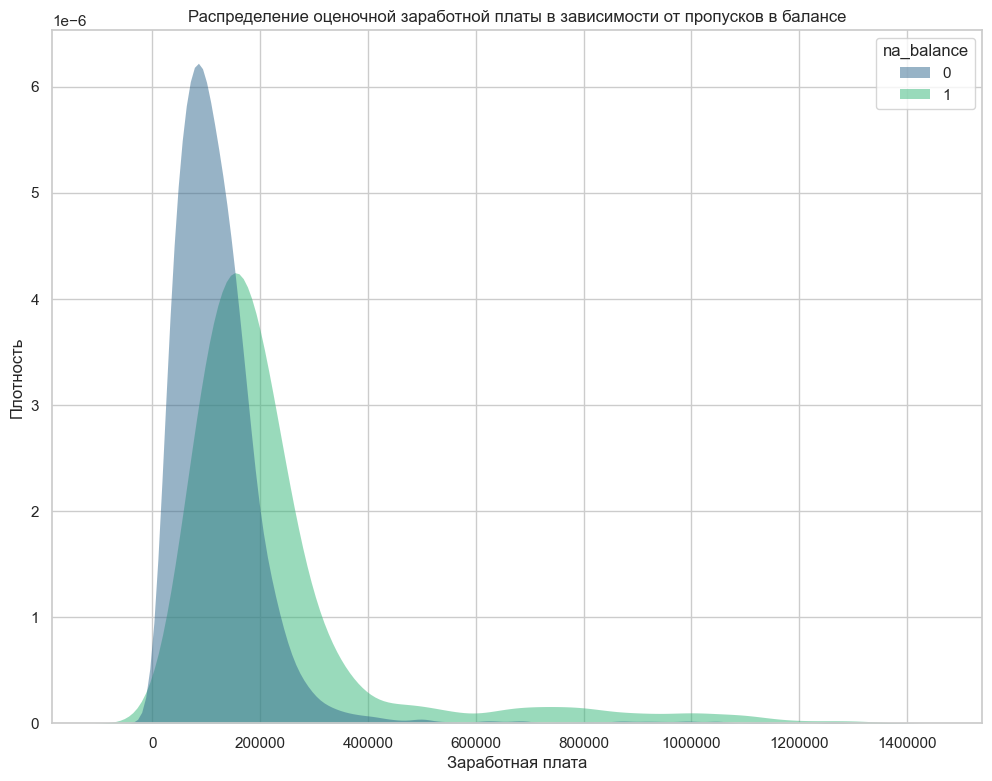

In [17]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.kdeplot(
   data=df, 
    x="est_salary", 
    hue="na_balance",
    fill=True, 
    common_norm=False, 
    palette="viridis",
    alpha=.5, 
    linewidth=0)
ax.set(xlabel='Заработная плата', ylabel='Плотность', 
       title='Распределение оценочной заработной платы в зависимости от пропусков в балансе')
plt.show();

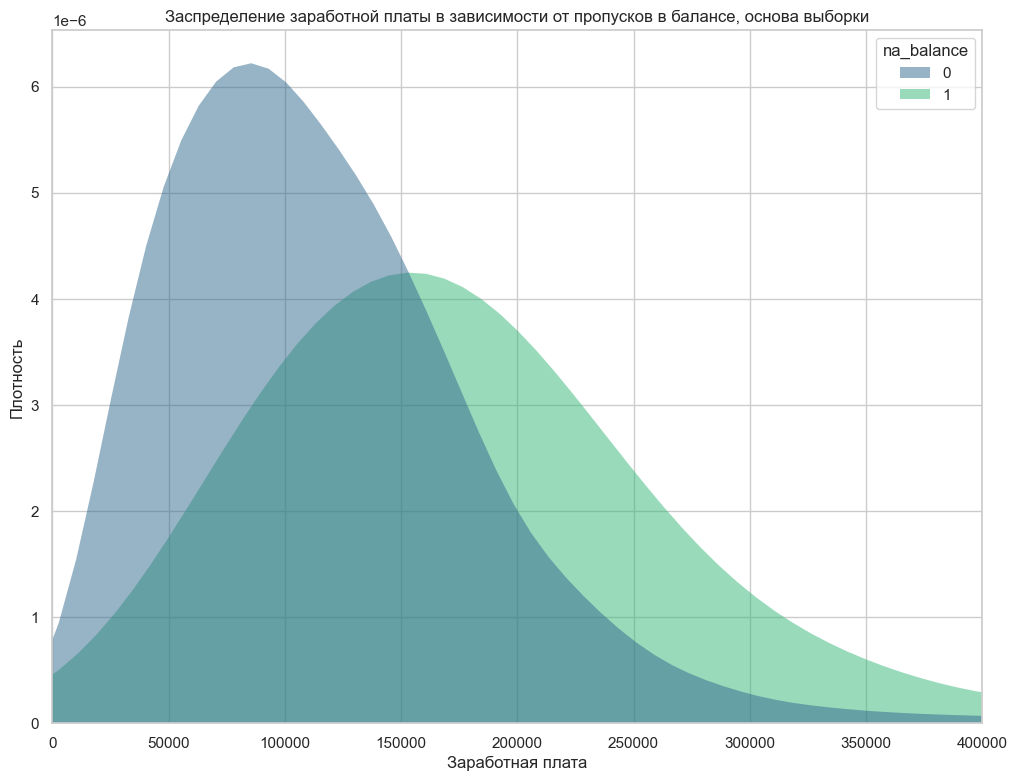

In [18]:
ax = sns.kdeplot(
   data=df, 
    x="est_salary", 
    hue="na_balance",
    fill=True, 
    common_norm=False, 
    palette="viridis",
    alpha=.5, 
    linewidth=0)
ax.set(xlabel='Заработная плата', ylabel='Плотность', 
       title='Заспределение заработной платы в зависимости от пропусков в балансе, основа выборки')
ax.set(xlim=(0, 400000))
plt.show()


In [19]:
print('Медиана скора для пропусков: {:.0f}, медиана для данных без пропусков: {:.0f}'
      .format(df.query('na_balance == 1')['est_salary'].median(), 
              df.query('na_balance == 0')['est_salary'].median()))

Медиана скора для пропусков: 174161, медиана для данных без пропусков: 106222


Видно, что **между данными с пропусками и без есть заметные различия**. Для клиентов с пропусками характерна более высокая ЗП. Для клиентов без пропусков мода находится в районе 100_000 рублей, для клиентов с пропусками она ближе к 160_000. Медианы лишь подтверждают наблюдения, между ними разница около 70%, что крайне существенно. Заполнять пропуски медианами явно было бы некорректно.

### Кредитный скор

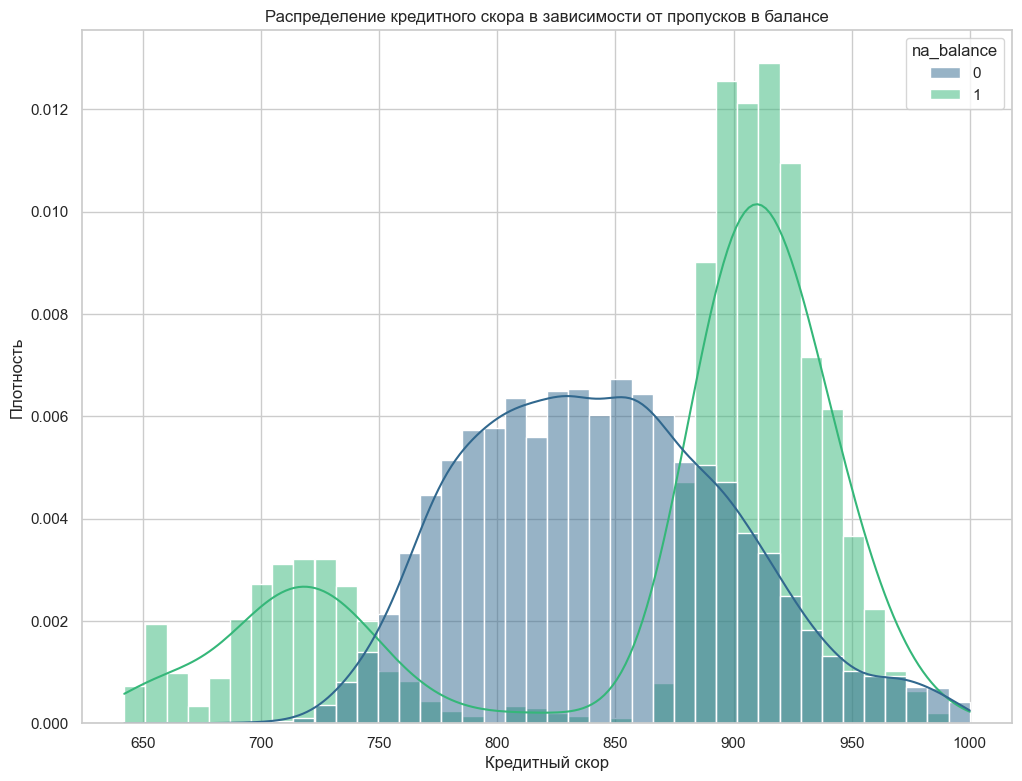

In [20]:
ax = sns.histplot(
    df, x="score", hue="na_balance",
    stat="density", common_norm=False, kde=True, palette="viridis");
ax.set(xlabel='Кредитный скор', ylabel='Плотность', 
       title='Распределение кредитного скора в зависимости от пропусков в балансе')
plt.show()

In [21]:
print('Медиана скора для пропусков: {:.0f}, медиана для данных без пропусков: {:.0f}'
      .format(df.query('na_balance == 1')['score'].median(), 
              df.query('na_balance == 0')['score'].median()))

Медиана скора для пропусков: 903, медиана для данных без пропусков: 840


**Между кредитными скорами видны очень заметные различия.** Различия заметны не только в модах, но и характерах распределения. Вообще, 2 распределения выглядят как части одного биноминального распределения. Все это еще сильнее укрепляет гипотезу, что пропуски в балансе совсем не случайны.  

### Количество продуктов

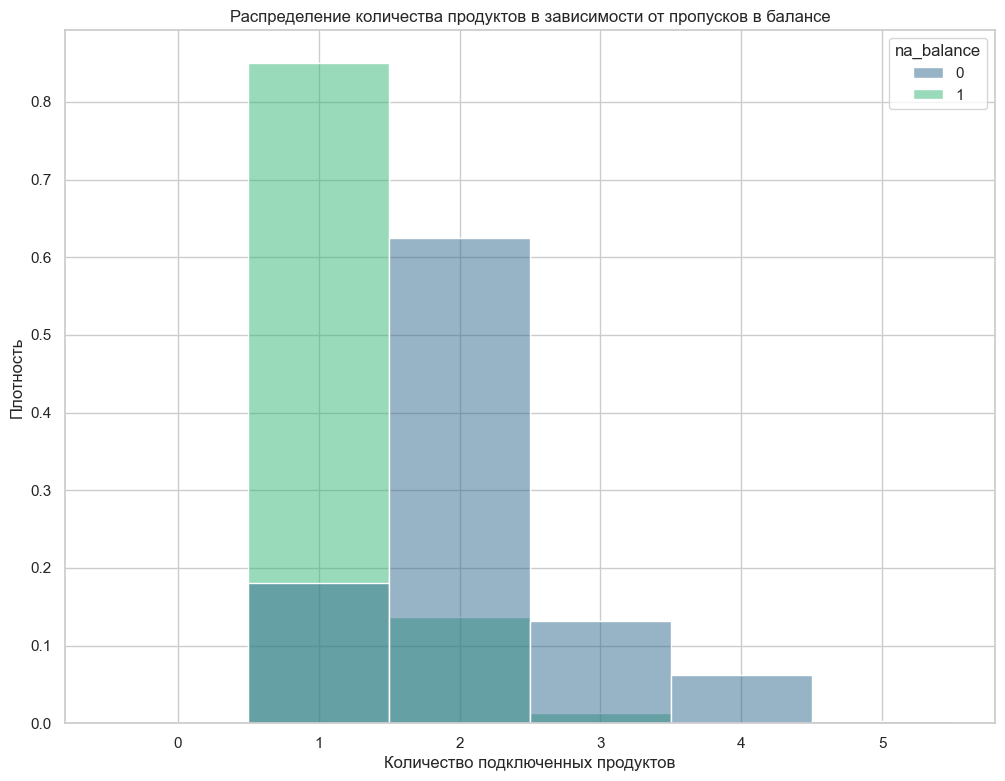

In [22]:
ax = sns.histplot(
    df, x="products", hue="na_balance",
    stat="density", common_norm=False, palette="viridis", discrete=True);
ax.set(xlabel='Количество подключенных продуктов', ylabel='Плотность', 
       title='Распределение количества продуктов в зависимости от пропусков в балансе')
plt.show()

In [23]:
print('Среднее скора для пропусков: {:.2f}, Среднее для данных без пропусков: {:.2f}'
      .format(df.query('na_balance == 1')['products'].mean(), 
              df.query('na_balance == 0')['products'].mean()))

Среднее скора для пропусков: 1.16, Среднее для данных без пропусков: 2.08


**Среди данных с пропусками гораздо меньше клиентов более чем с одним продуктом**. Подавляющее большинство клиентов лишь с одним продуктом сосредоточились среди данных с пропусками, как и наоборот, среди клиентов без пропусков почти все клиенты - люди с несколькими подключенными продуктами.

### Наличие кредитки

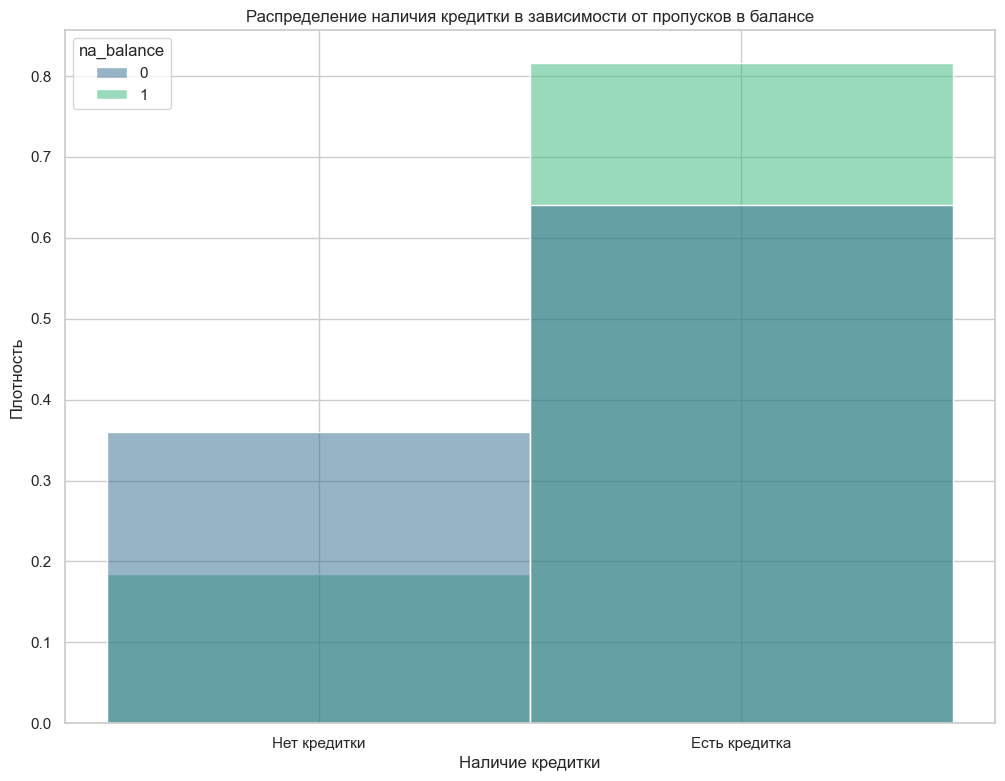

In [24]:
ax = sns.histplot(
    df, x="credit_card", hue="na_balance",
    stat="density", common_norm=False, palette="viridis", discrete=True);
ax.set(xlabel='Наличие кредитки', ylabel='Плотность', 
       title='Распределение наличия кредитки в зависимости от пропусков в балансе')
plt.xticks([0, 1], ['Нет кредитки', 'Есть кредитка'])
plt.show()

**Различие в наличие кредитке между группами заметна, но не столь как в остальных метриках**.

### Объекты в собственности

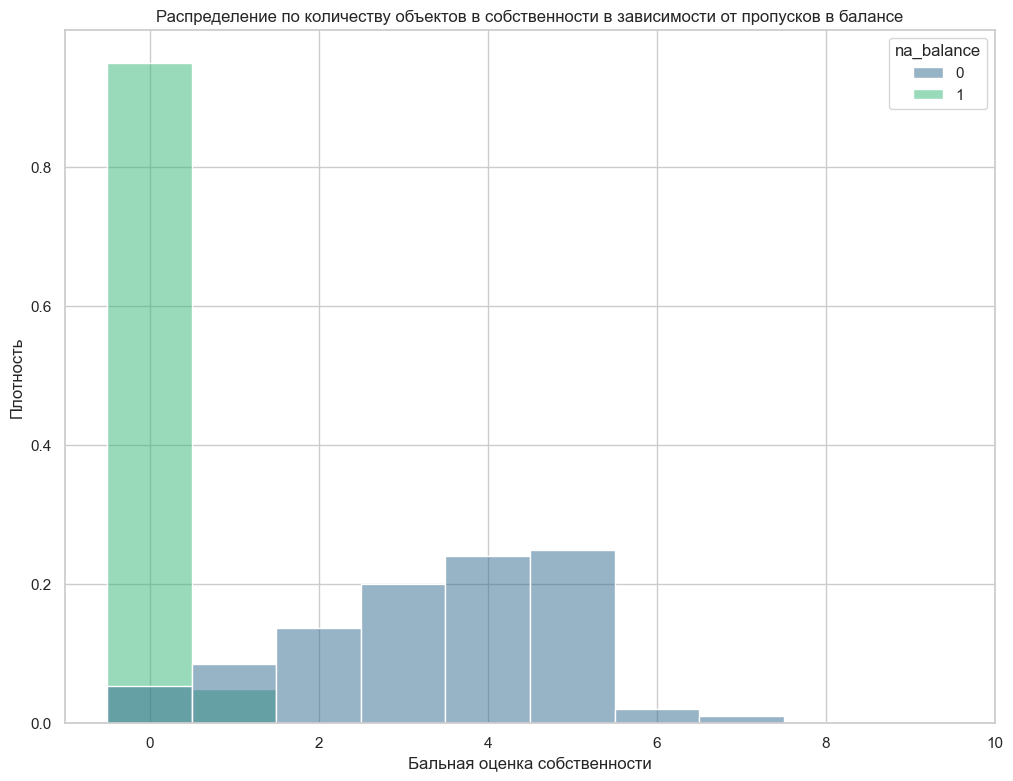

In [25]:
ax = sns.histplot(
    df, x="equity", hue="na_balance",
    stat="density", common_norm=False, palette="viridis", discrete=True);
ax.set(xlabel='Бальная оценка собственности', ylabel='Плотность', 
       title='Распределение по количеству объектов в собственности в зависимости от пропусков в балансе')
plt.show()

**Очень большая разница по объектам в собственности.** Среди данных с пропусками подавляющее - это 0, для данных без пропусков распределение относительно равномерное. Подтвердились показатели хитмэпа, по метрике equity видны наибольшие различия между группами. До этого уже не осталось сомнений, что пропуски в датафрейме случайны, сейчас же это можно констатировать с полной уверенностью.

**С высокой долей вероятности, пропуски прямо обусловлены этой метрикой.** Может быть, из-за какой-то ошибки выгрузки, бага или прочей технической проблемы.

### Недавняя активность

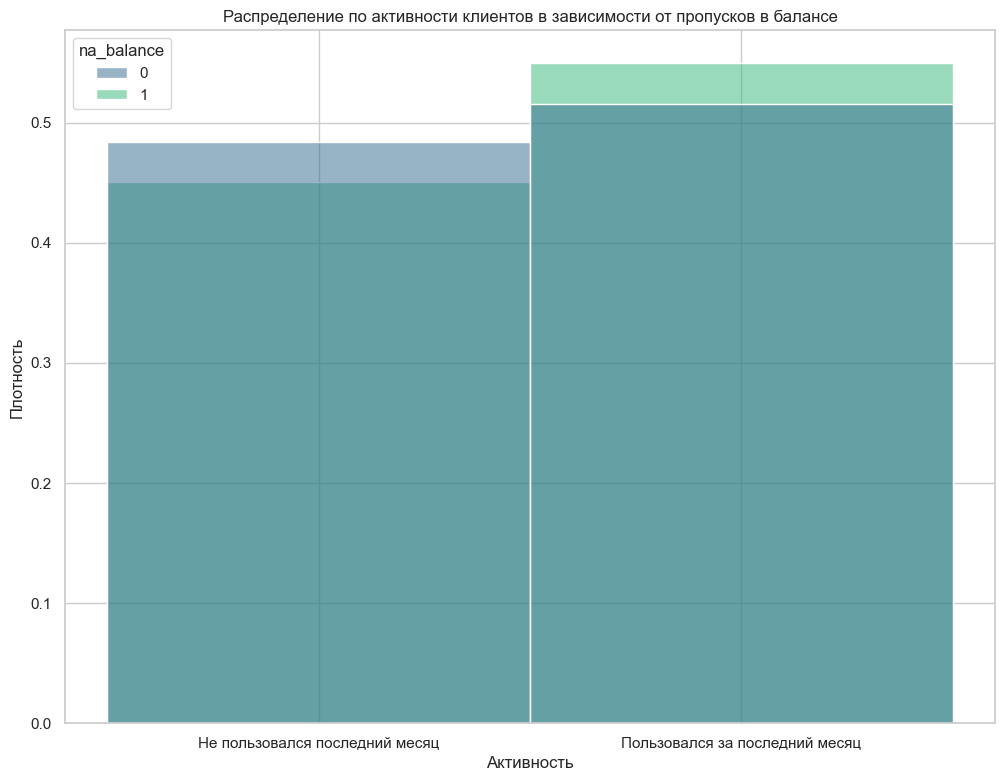

In [26]:
ax = sns.histplot(
    df, x="last_activity", hue="na_balance",
    stat="density", common_norm=False, palette="viridis", discrete=True);
ax.set(xlabel='Активность', ylabel='Плотность', 
       title='Распределение по активности клиентов в зависимости от пропусков в балансе')
plt.xticks([0, 1], ['Не пользовался последний месяц', 'Пользовался за последний месяц'])

plt.show()

**В активности пользователей между группами разница минимальна**

### Возраст

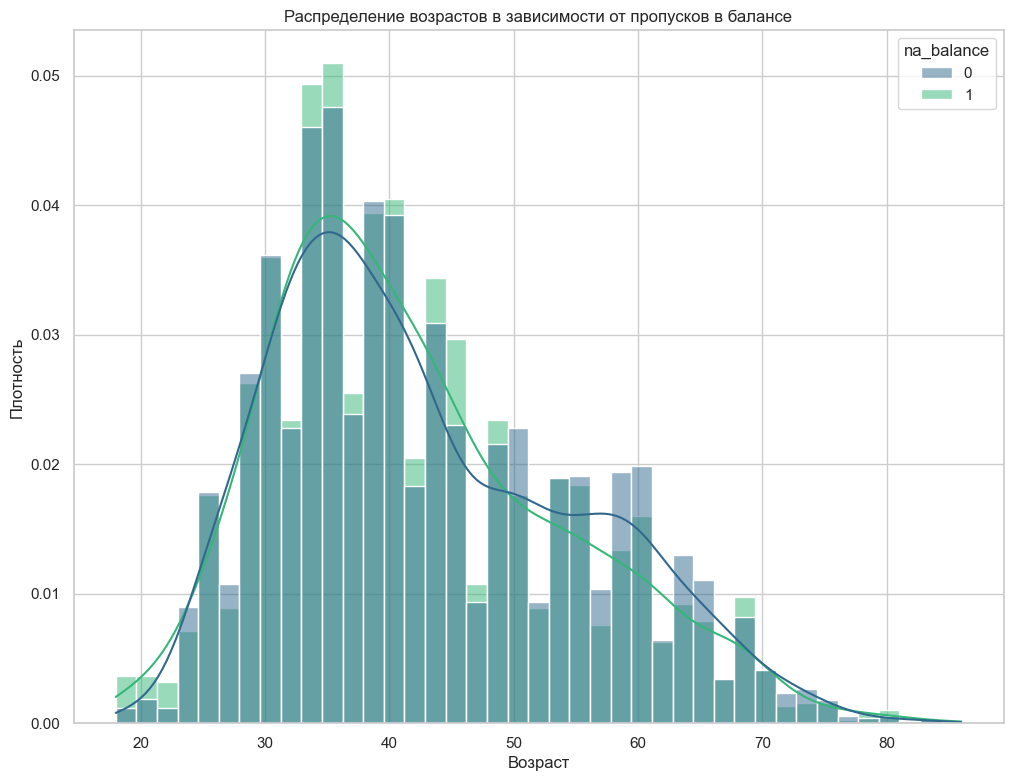

In [27]:
ax = sns.histplot(
    df, x="age", hue="na_balance",
    stat="density", common_norm=False, kde=True, palette="viridis");
ax.set(xlabel='Возраст', ylabel='Плотность', 
       title='Распределение возрастов в зависимости от пропусков в балансе')
plt.show()

**Между возрастами разница оказалась минимальной**

### Города

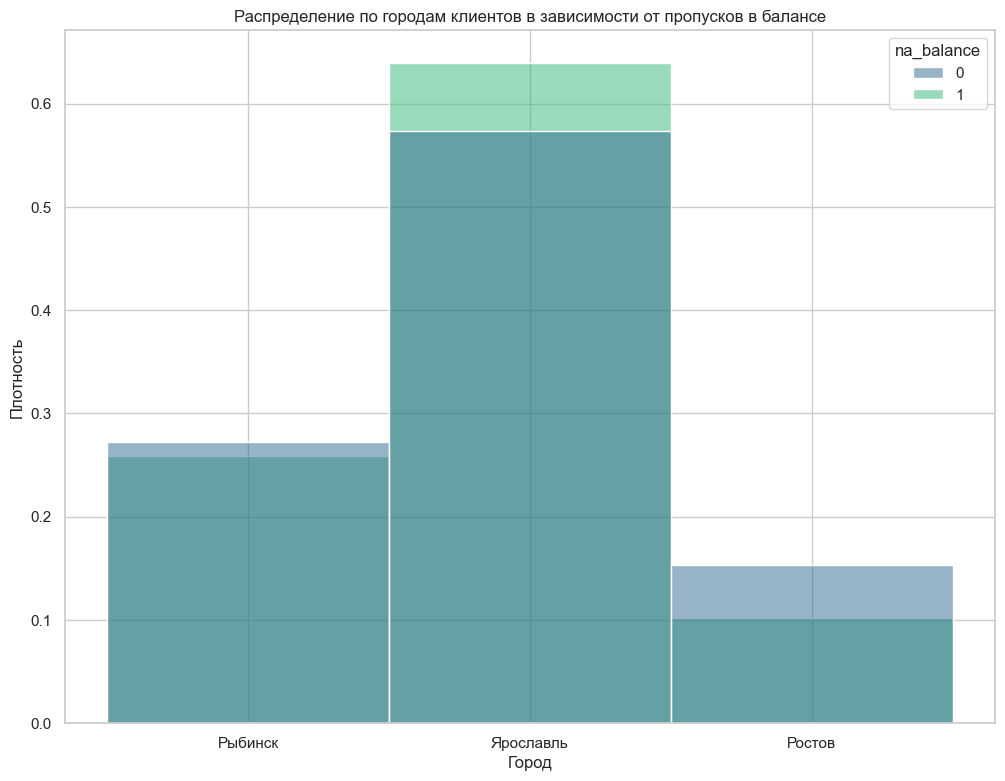

In [28]:
ax = sns.histplot(
    df, x="city", hue="na_balance",
    stat="density", common_norm=False, palette="viridis");
ax.set(xlabel='Город', ylabel='Плотность', 
       title='Распределение по городам клиентов в зависимости от пропусков в балансе')
plt.show()

Больше данных с пропусками характерны для Ярославля и наоборот, в Ростове и Рыбинске их меньше, различия довольно заметны. 
Можно было бы списать разницу в зарплатах на разницу в средних зарплатах по регионам. 
Но судя по даннным медианных зарплат, разница между регионами минимальна, так что различие в балансе кроется в чем-то другом.

### Пол

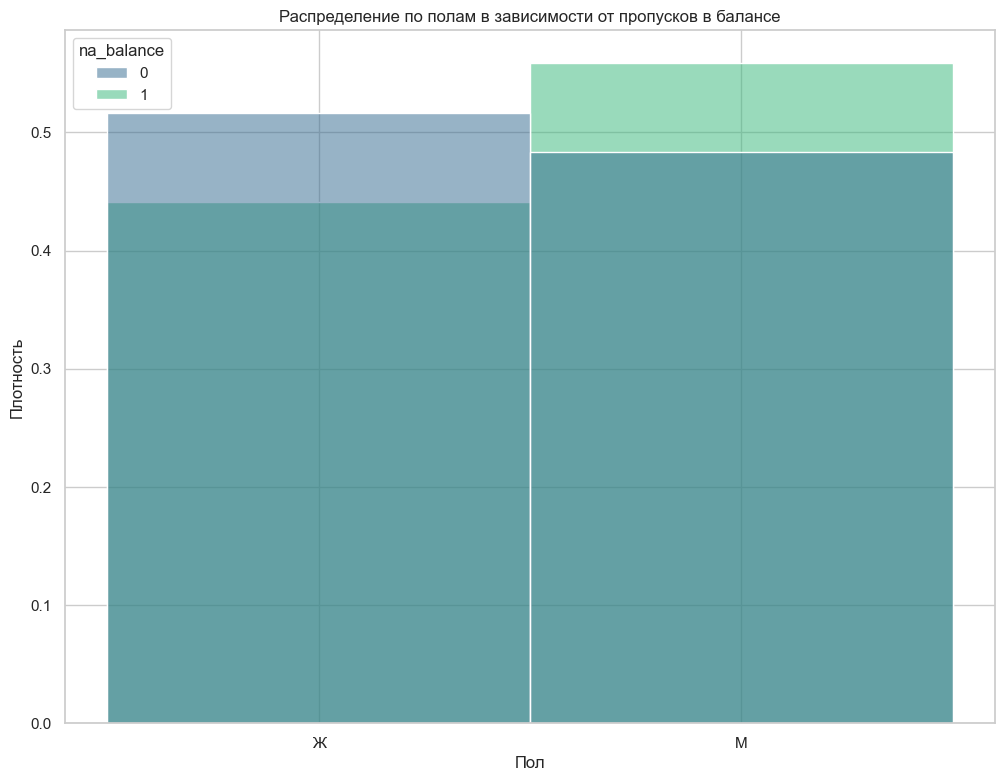

In [29]:
ax = sns.histplot(
    df, x="gender", hue="na_balance",
    stat="density", common_norm=False, palette="viridis");
ax.set(xlabel='Пол', ylabel='Плотность', 
       title='Распределение по полам в зависимости от пропусков в балансе')
plt.show()

**По полам между группами разница выражена слабо**

**Итог**

Природа пропусков баланса не выглядят случайной. По некоторым метрикам видны заметные различия между группами:
- **Количество объектов в собственности(equity)**
- Количество подключенных продуктов
- Кредитный скор
- Приблизительная заработная плата

Наверняка понять причину пропусков по данным не видится возможным, но колоссальная разница по метрике equity наталкивает на мысль, что причина пропусков может быть связа с ней. Вполне возможно, из-за какого-то бага.
Собственно, сами пропуски похожи на MAR или MNAR

In [30]:
# сохраним в переменную, на всякий случай
old_balance = df.balance.copy()

### Заполнение пропусков в балансе

In [31]:
# заполнение пропусков по формуле (медиана баланса * доля медианы зп от зп конкретного юзера)
print('Медиана приблизительной ЗП в данным с пропусками: {:.1f}'.format(df.query('na_balance == 1')['est_salary'].median()))
print('Медиана приблизительной ЗП в данным без пропусков: {:.1f}'.format(df.query('na_balance == 0')['est_salary'].median()))
print('Медиана баланса до заполнения: {:.1f}'.format(df['balance'].median()))
print('----------')

df['balance'] = df['balance'].fillna((df['balance'].median() * (df['est_salary'] / df['est_salary'].median())))
print(df.query('na_balance == 1')['balance'].head())
print('----------')
print('Медиана баланса после заполнения: {:.1f}'.format(df['balance'].median()))
print('Медиана баланса по данным с пропусками после заполнения: {:.1f}'.format(df.query('na_balance == 1')['balance'].median()))

Медиана приблизительной ЗП в данным с пропусками: 174160.7
Медиана приблизительной ЗП в данным без пропусков: 106222.2
Медиана баланса до заполнения: 524272.2
----------
2      471,805.75
9    1,043,020.83
10     862,351.04
11     952,824.74
19     644,483.92
Name: balance, dtype: float64
----------
Медиана баланса после заполнения: 594822.7
Медиана баланса по данным с пропусками после заполнения: 763070.8


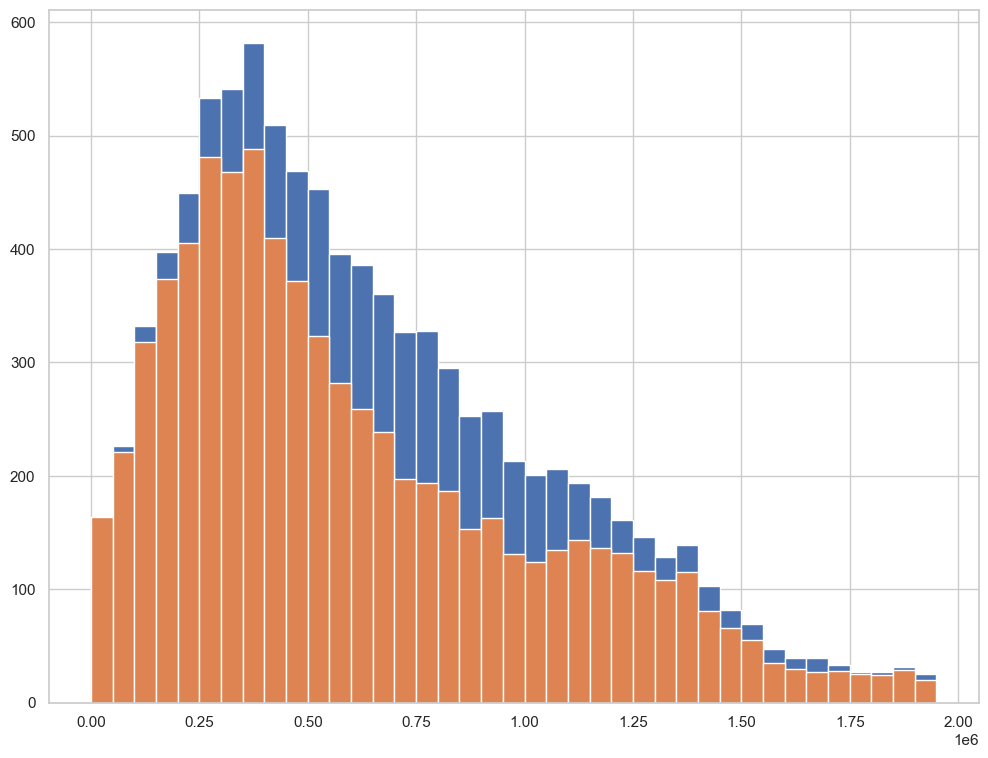

In [76]:
# посмотрим, как заполнились пропуски
bins = np.arange(0, 2e6, 5e4)
df['balance'].hist(bins=bins)
old_balance.hist(bins=bins);

### Итог

По всей видимости, пропуски в данных не были случайны, ибо прослеживается сильная корреляция наличия пропусков, а также нескольких метрик, в частности баллов собственности(equity), где корреляция составила 71%. Причем, если рассмотреть распределение по баллам объектов в собственности подробнее, видно, что почти все пропуски сконцентрированы на 0 баллов. Хоть и при этом для клиентов с пропусками в балансе характерны более высокие показатели приблизительной ЗП, что несколько контрастирует с нулевыми баллами equity.

Все это подводит к мысли, что пропуски в балансе вызваны каким-то багом выгрузки и прямо коррелируют с метрикой equity, подавляющее большинство пропусков у клиентов с нулем баллов equity. 

Но также, это заставляет предположить, что нули в equity являются результатом некой ошибки.

## Исследовательский анализ

### Хитмэп EDA

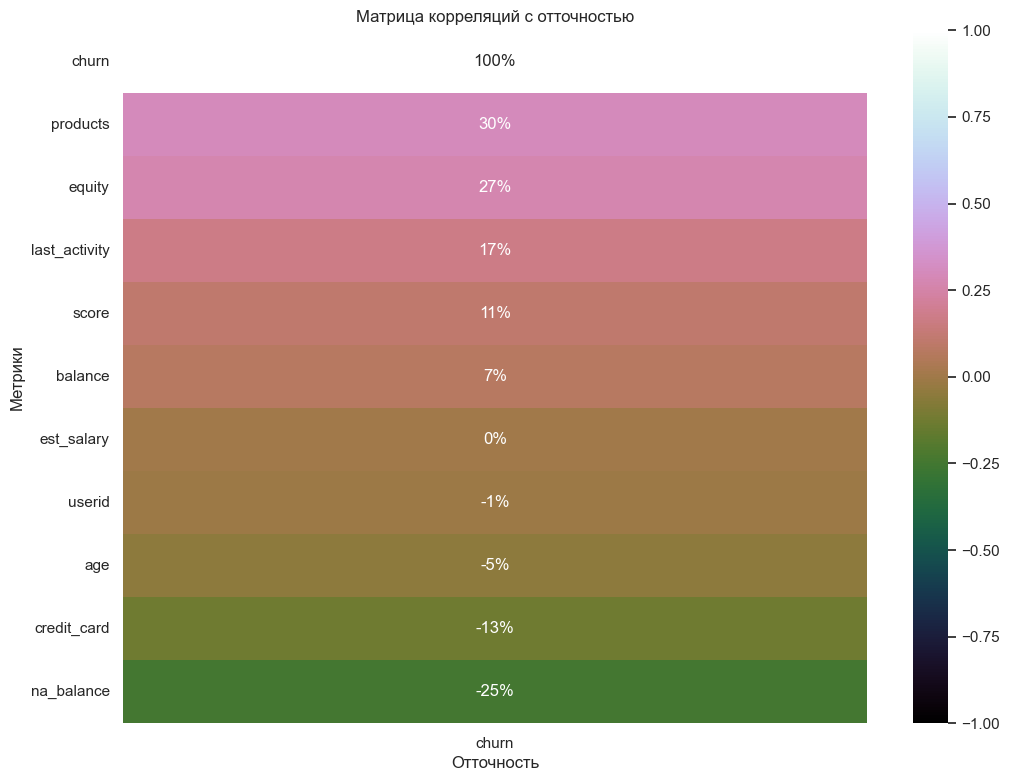

In [33]:
heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='cubehelix', 
                      fmt=".0%", 
                      center=0)
heatmap.set(title='Матрица корреляций с отточностью', xlabel='Отточность', ylabel='Метрики');

Больше всего бросается в глаза нулевая корреляция с приблизительной зп, это довольно любопытно, имеет смысл проверить эту метрику подробнее. Очень низкие же корреляции наблюдаются у возрастов и баланса.

Всего мы имеем 5 метрик, корреляция которых превзошла 10%
По шкале Чеддока выходит, что кредитный скор, наличие кредитки, недавняя активность и баллы собственности показали лишь слабую корреляцию. 
И лишь количество подключенных продуктов показало значение на границе слабой и умеренной. В целом, ни одной явно коррелирующей с отточностью метрики, посему потребуется более подробное изучение.

### Баланс EDA

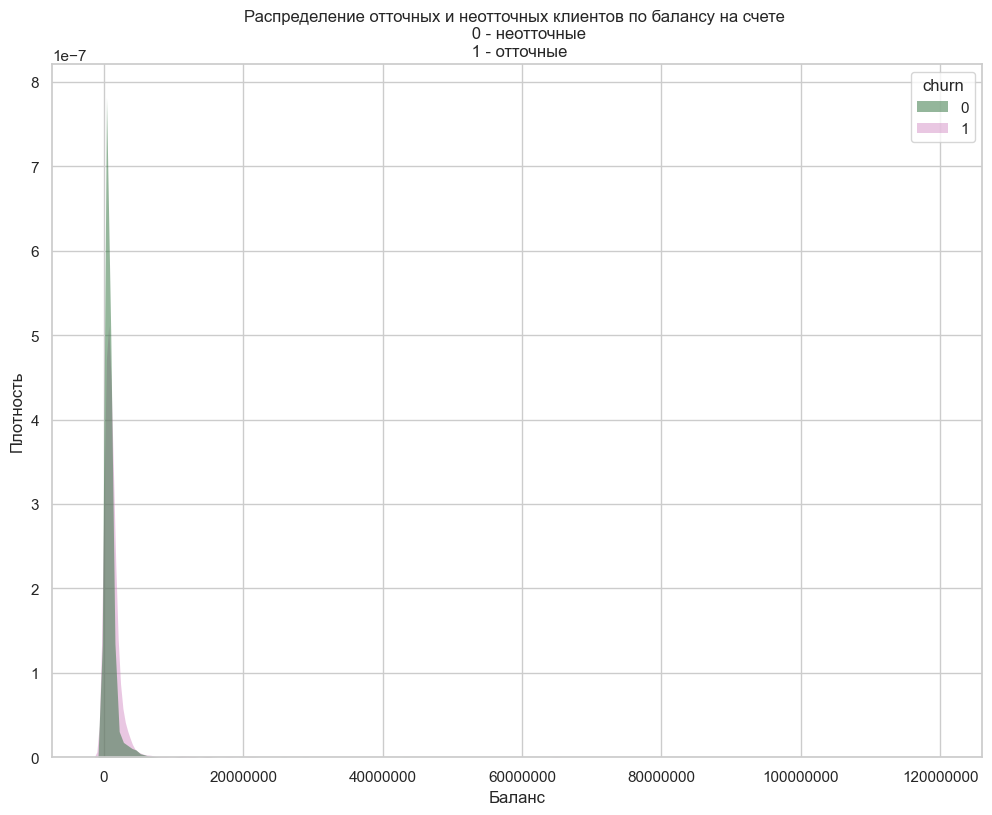

In [34]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.kdeplot(
   data=df, 
    x="balance", 
    hue="churn",
    fill=True, 
    common_norm=False, 
    palette="cubehelix",
    alpha=.5, 
    linewidth=0)
ax.set(xlabel='Баланс', ylabel='Плотность', 
       title='Распределение отточных и неотточных клиентов по балансу на счете \n      0 - неотточные \n 1 - отточные')
plt.show()

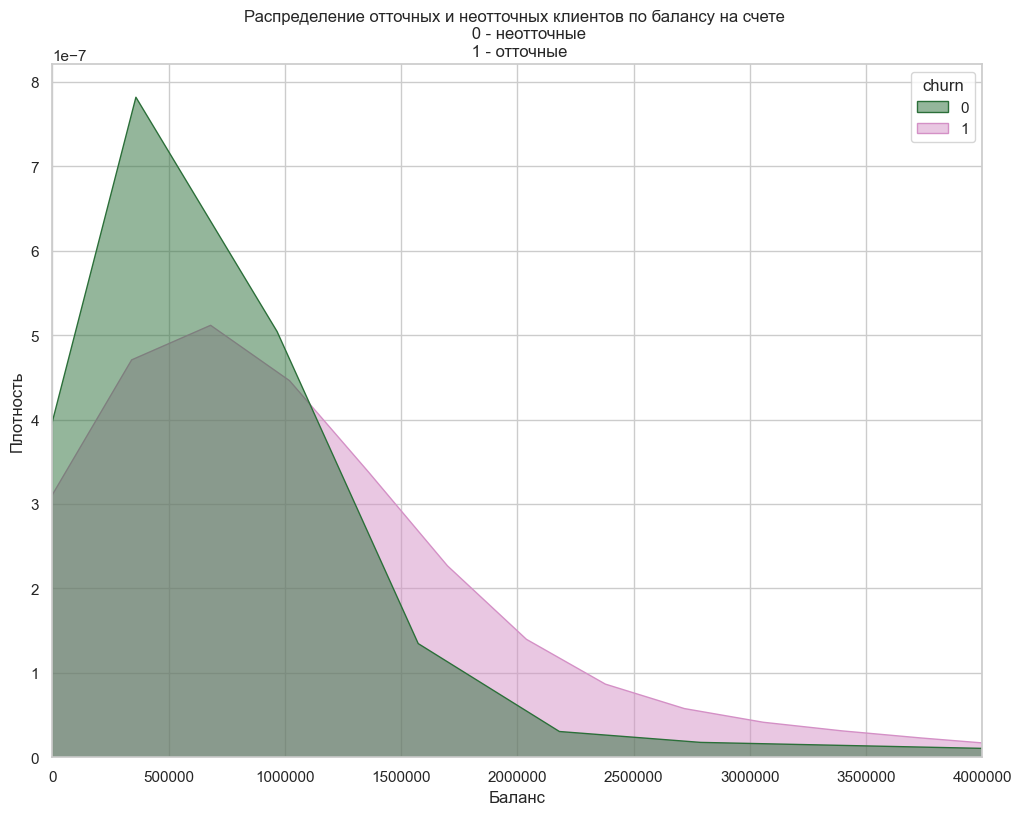

In [35]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.kdeplot(
    data=df, 
    x="balance", 
    hue="churn",
    fill=True, 
    common_norm=False, 
    palette="cubehelix",
    alpha=.5, 
    linewidth=1)

ax.set(xlim=(0, 4000000))
ax.set(xlabel='Баланс', ylabel='Плотность', 
       title='Распределение отточных и неотточных клиентов по балансу на счете \n      0 - неотточные \n 1 - отточные')
plt.show()

In [36]:
print('Медиана баланса для отточных клиентов: {:.0f}'
      .format(df.query('churn == 1')['balance'].median()))
print('Медиана баланса для неотточных клиентов: {:.0f}'
      .format(df.query('churn == 0')['balance'].median()))

Медиана баланса для отточных клиентов: 786159
Медиана баланса для неотточных клиентов: 567354


Несмотря на довольно низкую корреляцию на хитмэпе, для отточных клиентов характерен заметно более высокий медианный баланс и мода.
Примерно после 1 миллиона рублей, количество клиентов начинает заметно отваливаться.
Вполне возможно, таким клиентам не хватает разнообразных услуг завязанных на большом балансе или каких-нибудь интересных льготных предложений. Надо будет проследить это по остальным метрикам. 

### Приблизительная ЗП EDA

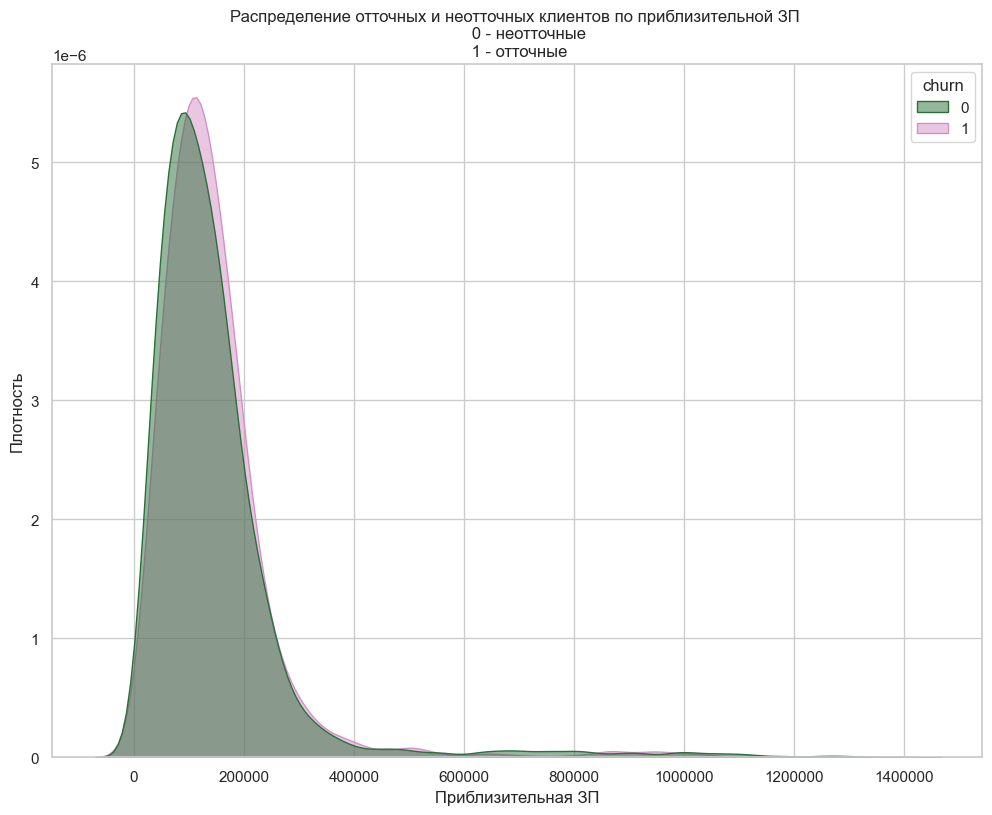

In [37]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.kdeplot(
    data=df, 
    x="est_salary", 
    hue="churn",
    fill=True, 
    common_norm=False, 
    palette="cubehelix",
    alpha=.5, 
    linewidth=1)

ax.set(xlabel='Приблизительная ЗП', ylabel='Плотность', 
       title='Распределение отточных и неотточных клиентов по приблизительной ЗП \n      0 - неотточные \n 1 - отточные')
plt.show()

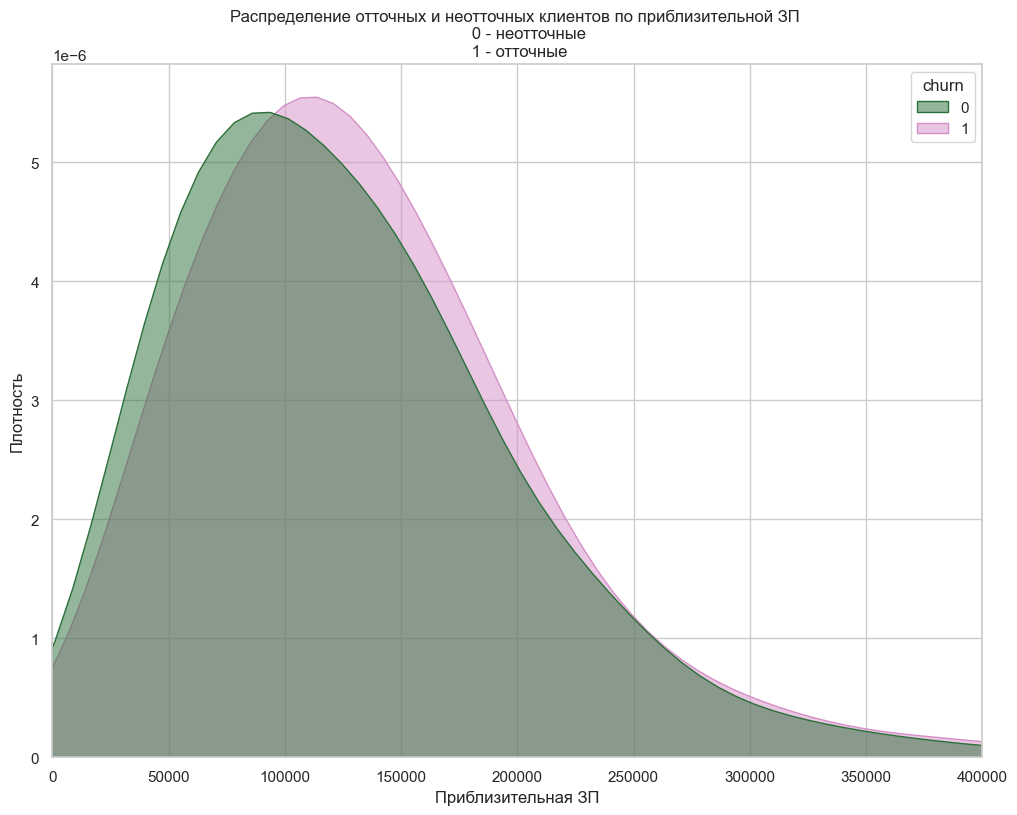

In [38]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.kdeplot(
    data=df, 
    x="est_salary", 
    hue="churn",
    fill=True, 
    common_norm=False, 
    palette="cubehelix",
    alpha=.5, 
    linewidth=1)

ax.set(xlim=(0, 400000))
ax.set(xlabel='Приблизительная ЗП', ylabel='Плотность', 
       title='Распределение отточных и неотточных клиентов по приблизительной ЗП \n      0 - неотточные \n 1 - отточные')
plt.show()

In [39]:
print('Медиана приблизительной ЗП для отточных клиентов: {:.0f}'
      .format(df.query('churn == 1')['est_salary'].median()))
print('Медиана приблизительной ЗП для неотточных клиентов: {:.0f}'
      .format(df.query('churn == 0')['est_salary'].median()))

Медиана приблизительной ЗП для отточных клиентов: 125391
Медиана приблизительной ЗП для неотточных клиентов: 118258


Несмотря на нулевую корреляцию на хитмэпе, разница в распределениях все же видна. Она не столь заметна как в балансе, но все же, для отточных клиентов характерны более высокие показатели приблизительной ЗП. Разве что, где-то после 250_000 ЗП обе группы по пропорциям примерно сравниваются. Сильные различия между группами характерны для клиентов с ЗП выше среднего, но не для верхней части выборки. 

### Кредитный скор EDA

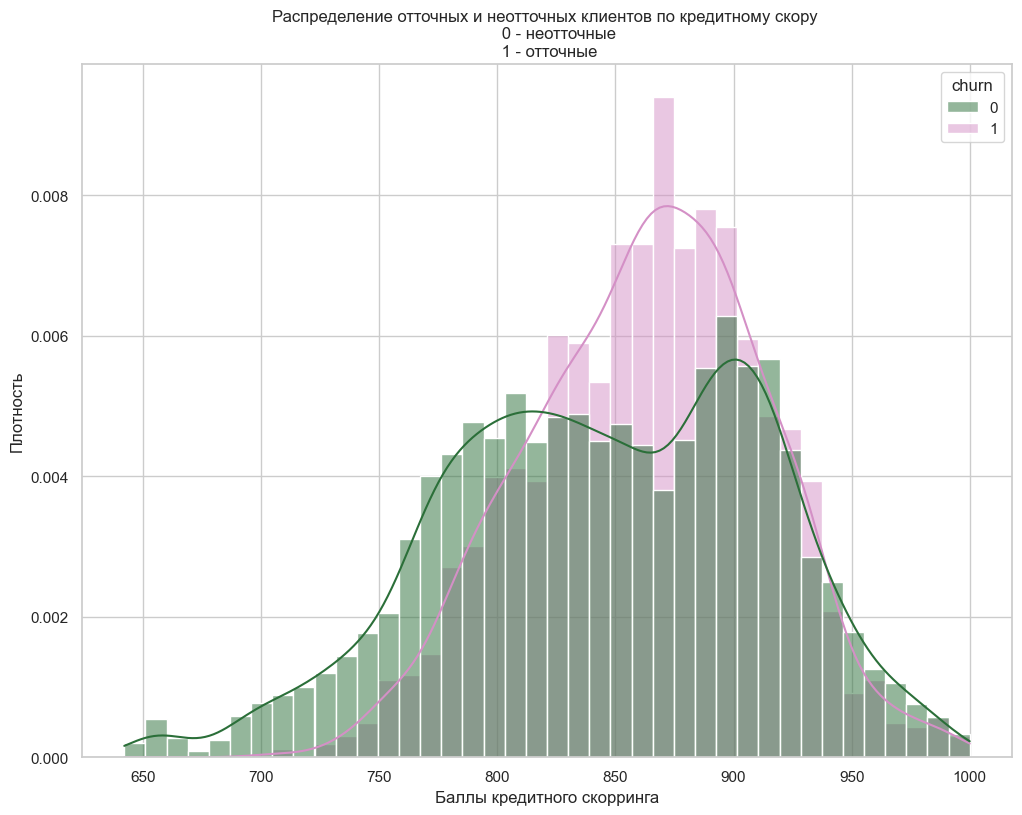

In [40]:
ax = sns.histplot(
     df, x="score", 
    hue="churn",
    stat="density", 
    common_norm=False, 
    kde=True, 
    palette="cubehelix");

ax.set(xlabel='Баллы кредитного скорринга', ylabel='Плотность', 
       title='Распределение отточных и неотточных клиентов по кредитному скору \n      0 - неотточные \n 1 - отточные')
plt.show()

In [41]:
print('Медиана баллов кредитного скорринга для отточных клиентов: {:.0f}'
      .format(df.query('churn == 1')['score'].median()))
print('Медиана баллов кредитного скорринга для неотточных клиентов: {:.0f}'
      .format(df.query('churn == 0')['score'].median()))

Медиана баллов кредитного скорринга для отточных клиентов: 866
Медиана баллов кредитного скорринга для неотточных клиентов: 848


Очень интересно выглядит график скоринга. До ~830 баллов пропорция неотточных клиентов доминирует над отточными, но после этого трешхолда идет резкий перевес в сторону отточности. Свыше ~920 баллов пропорции в среднем сравниваются. Опять прослеживается схожая тенденция, что и на предыдущих метриках. Чем более состоятельный клиент - тем с большей вероятностью он отваливается от нас. Также, как и было с приблизительной ЗП, среди верхней части выборки пропорции отточности уже почти не отличаются. 

### Количество продуктов EDA

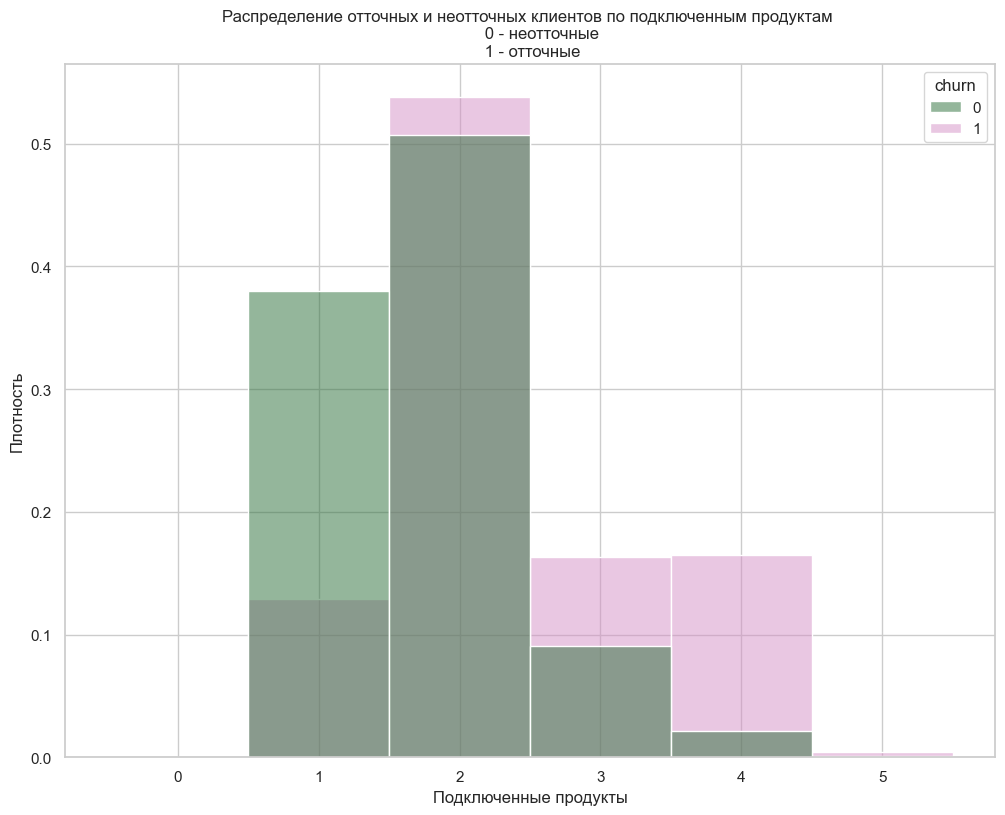

In [42]:
ax = sns.histplot(
    df, 
    x="products", 
    hue="churn",
    stat="density", 
    common_norm=False, 
    palette="cubehelix", 
    discrete=True);

ax.set(xlabel='Подключенные продукты', ylabel='Плотность', 
       title='Распределение отточных и неотточных клиентов по подключенным продуктам \n      0 - неотточные \n 1 - отточные')
plt.show()

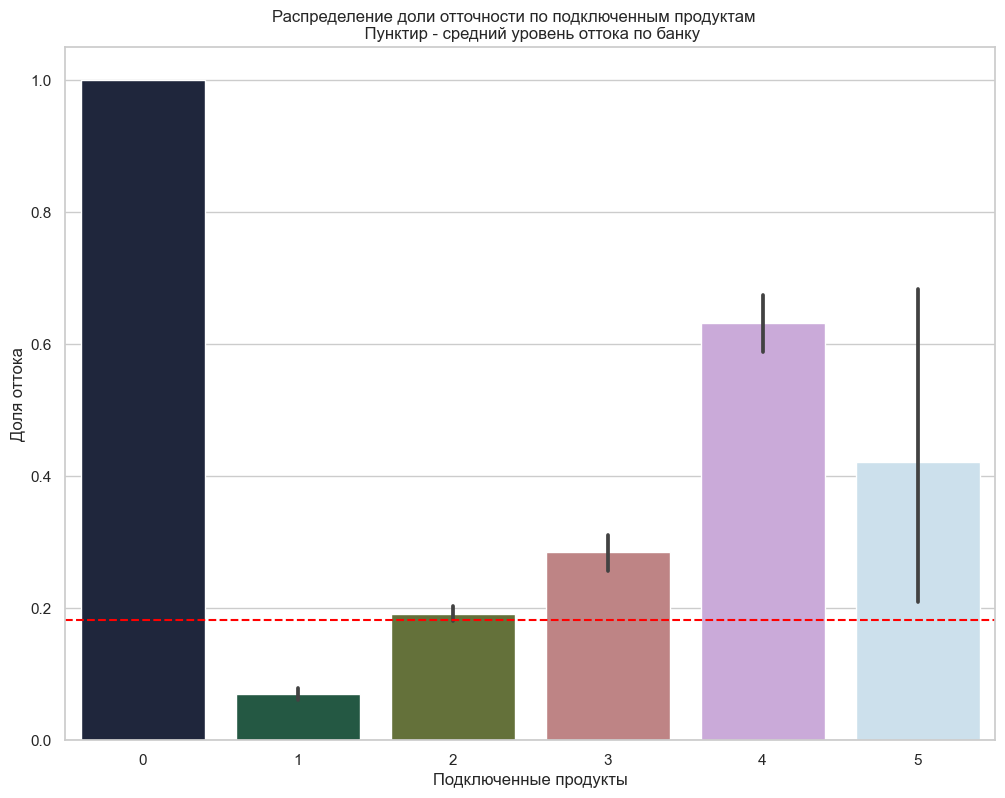

In [43]:
ax = sns.barplot(data=df, 
                 x="products", 
                 y="churn", 
                 palette="cubehelix")
ax.axhline(y=df['churn'].mean(), color='red', linestyle='--')
ax.set(xlabel='Подключенные продукты', ylabel='Доля оттока', 
       title='Распределение доли отточности по подключенным продуктам\
       \n Пунктир - средний уровень оттока по банку')
plt.show()

Как и показал хитмэп, между группами **по количеству подключенных продуктов видна сильная корреляция.** Клиенты начинают становиться отточными с увеличением количества подключенных продуктов. Гипотеза о том, что с ростом интеграции в нашу систему клиенты начинают чувствовать нехватку услуг или сервиса выглядит небезосновательной. 
Наименее отточными являются клиенты лишь с одним подключенным продуктом. С ростом количества продуктов начинает расти и отточность, но для пяти подключенных продуктов она ниже, по сравнению с четырьмя продуктами. В прочем, клиентов с пятью продуктами очень мало - лишь 19, так что это можно списать на флуктуацию. Также стоит обратить внимание, лишь у одного клиента 0 подключенных продуктов и это явная аномалия.

### Наличие кредитки EDA

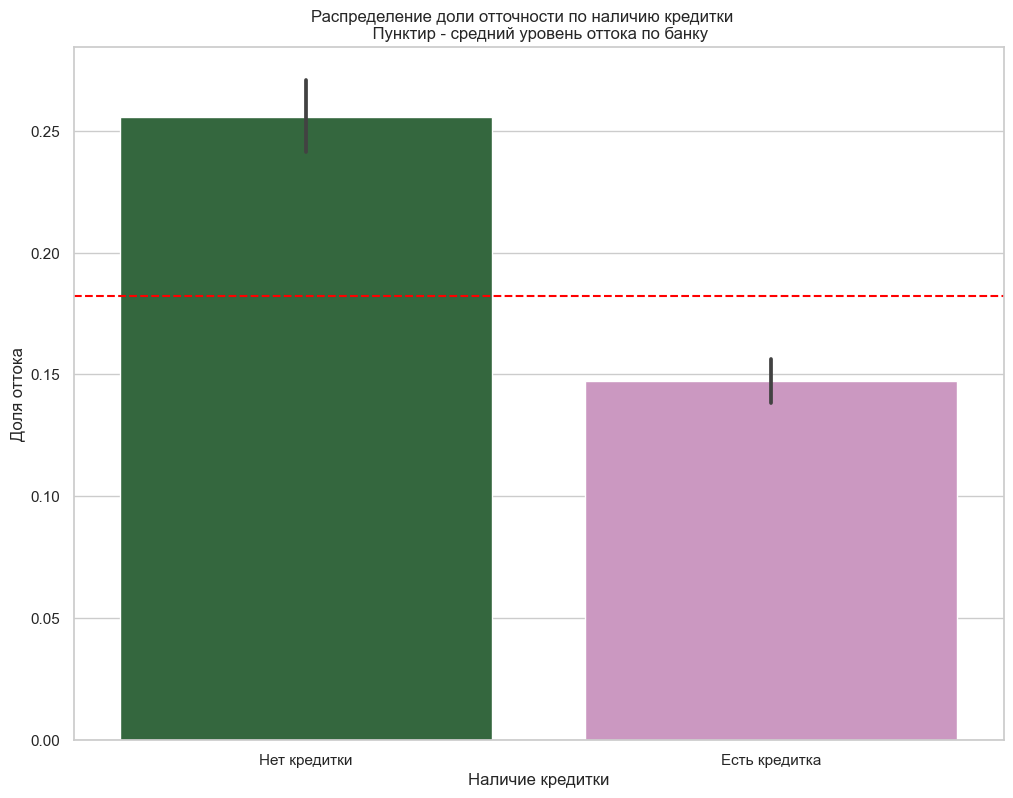

In [44]:
ax = sns.barplot(data=df, 
                 x="credit_card", 
                 y="churn", 
                 palette="cubehelix")
ax.axhline(y=df['churn'].mean(), color='red', linestyle='--')
ax.set(xlabel='Наличие кредитки', ylabel='Доля оттока', 
       title='Распределение доли отточности по наличию кредитки\
       \n Пунктир - средний уровень оттока по банку')
plt.xticks([0, 1], ['Нет кредитки', 'Есть кредитка'])
plt.show()

**В плане наличия кредитки между группами есть заметные различия**, но специфика как будто бы не похожа на остальные метрики. Наличие кредитной карты, казалось бы, больше свойственно лицам с большим достатком и ожидалась обратная корреляция. Однако, среди группы с кредиткой отточных клиентов меньше, чем в группе без кредитки. Вполне возможно, предположение о большей состоятельности клиентов с кредитками просто ошибочно. Либо сами кредитки в нашей системе обладают действительно высокой привлекательностью. Имеет смысл проверить предыдущую гипотезу чуть подробнее.

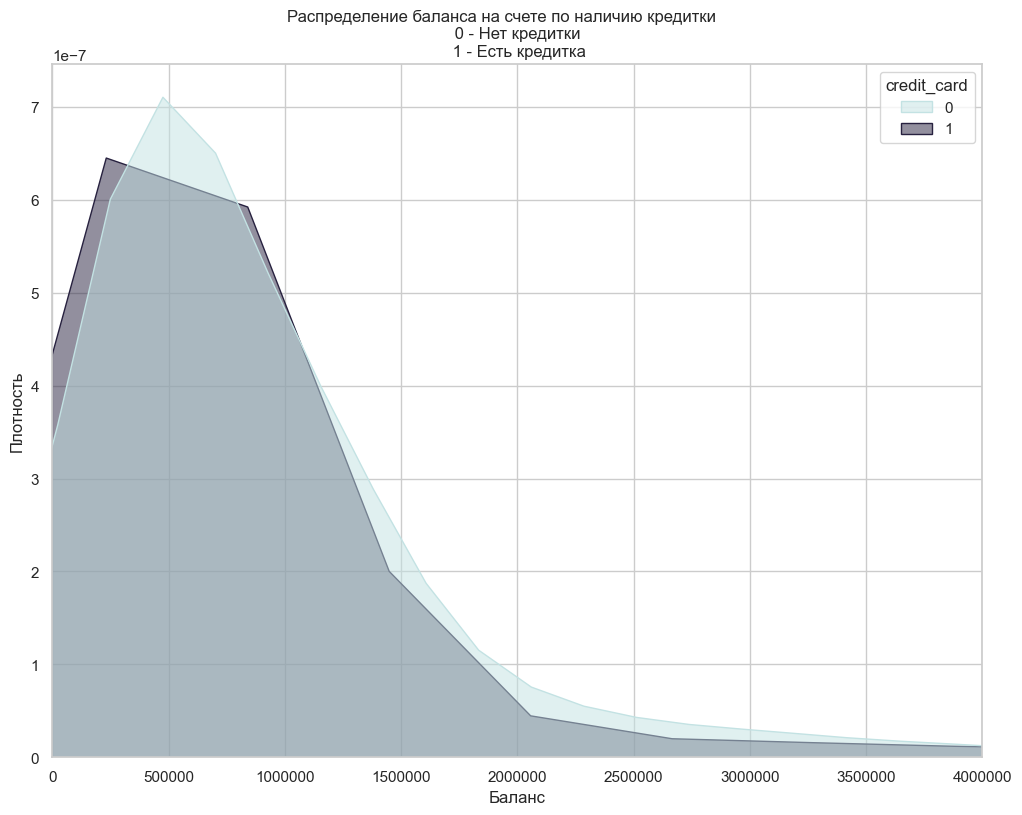

In [45]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.kdeplot(
    data=df, 
    x="balance", 
    hue="credit_card",
    fill=True, 
    common_norm=False, 
    palette="ch:start=.2,rot=-.3",
    alpha=.5, 
    linewidth=1)

ax.set(xlim=(0, 4000000))
ax.set(xlabel='Баланс', ylabel='Плотность', 
       title='Распределение баланса на счете по наличию кредитки\
       \n 0 - Нет кредитки \n 1 - Есть кредитка')
plt.show()

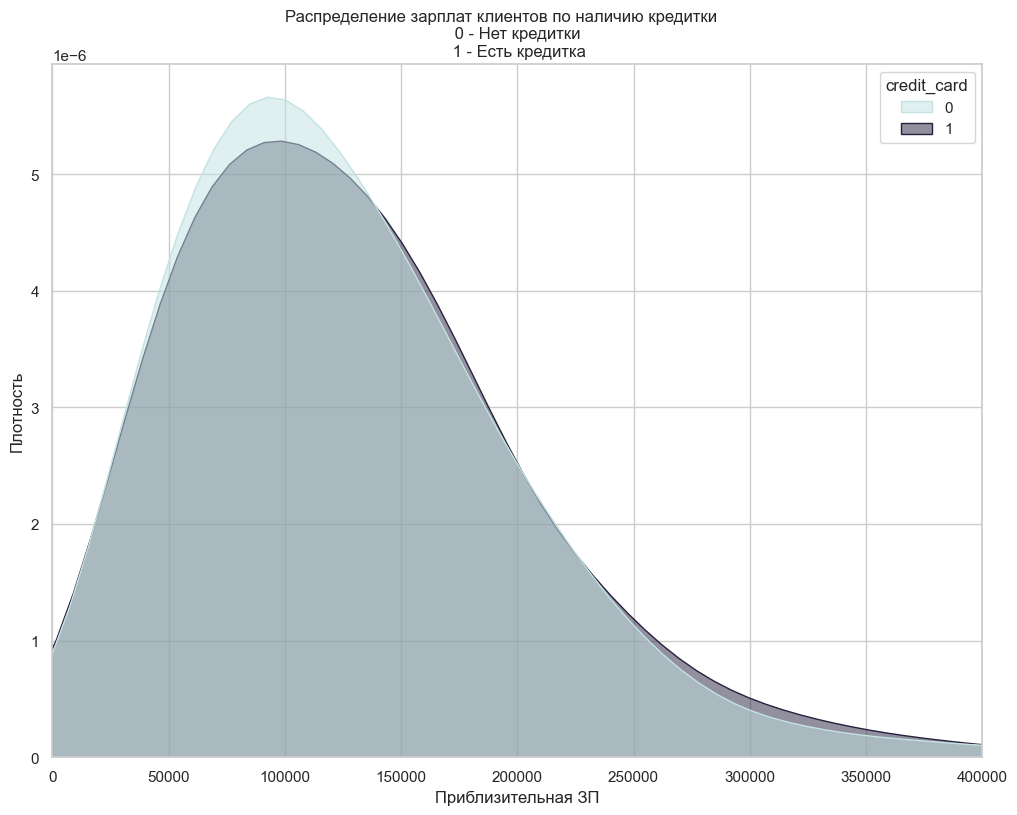

In [46]:
plt.ticklabel_format(style='plain', axis='x')
ax = sns.kdeplot(
    data=df, 
    x="est_salary", 
    hue="credit_card",
    fill=True, 
    common_norm=False, 
    palette="ch:start=.2,rot=-.3",
    alpha=.5, 
    linewidth=1)

ax.set(xlim=(0, 400000))
ax.set(xlabel='Приблизительная ЗП', ylabel='Плотность', 
       title='Распределение зарплат клиентов по наличию кредитки\
       \n 0 - Нет кредитки \n 1 - Есть кредитка')
plt.show()

Довольно противоречивые результаты. С одной стороны, в плане баланса получилось действительно так, что наличие кредитки скорее коррелировало с бОльшими цифрами и в этом случае, распределение метрики кредиток по отточности хорошо стыкуется с остальными метриками. 

С другой же стороны, в плане приблизительной ЗП ситуация несколько иная, здесь наоборот, большие ЗП чаще представлены среди лиц с кредитками.
Можно было бы подумать, что тем, у кого маленькая ЗП могут не выдавать кредитки чаще, но видимые различия начинаются примерно с отметки в 50 тысяч, до нее пропорции приблизительно равны, что в это предположение не совсем вписывается. 

**В целом же, тенденция по всей видимости повторяется и в том числе по метрики кредиток, отточность характерна для более обеспеченных клиентов.**

### Объекты в собственности EDA

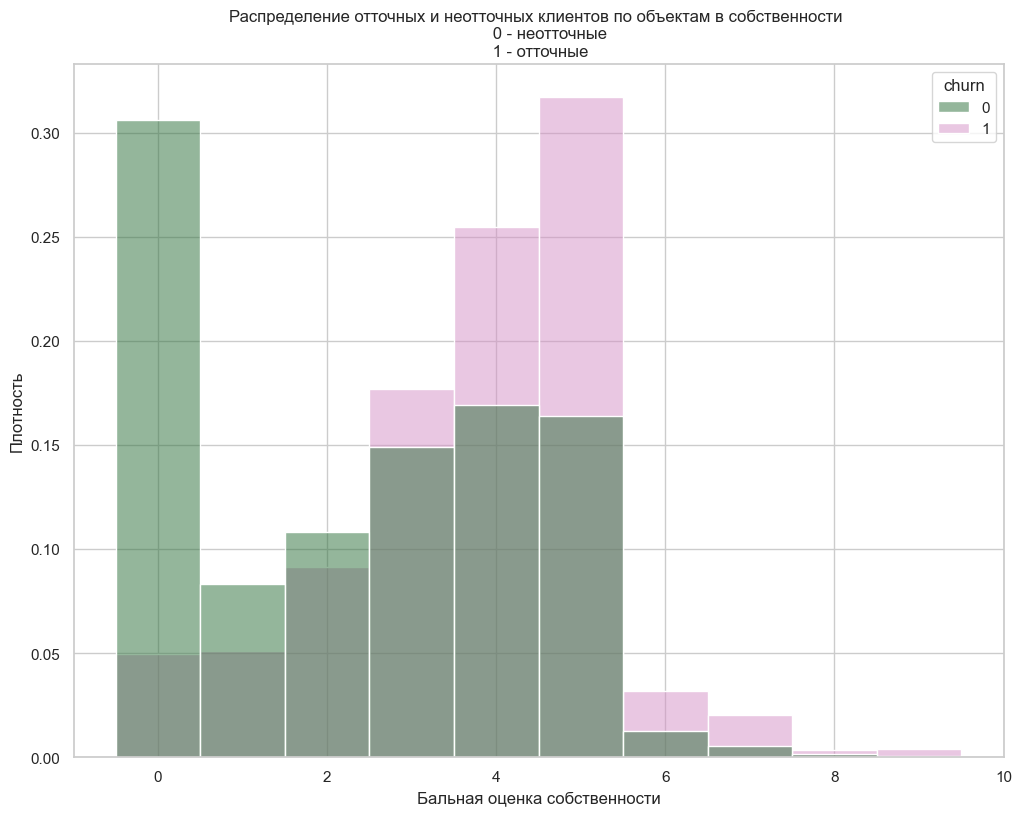

In [47]:
ax = sns.histplot(
    df, 
    x="equity", 
    hue="churn",
    stat="density", 
    common_norm=False, 
    palette="cubehelix", 
    discrete=True);

ax.set(xlabel='Бальная оценка собственности', ylabel='Плотность', 
       title='Распределение отточных и неотточных клиентов по объектам в собственности \n      0 - неотточные \n 1 - отточные')
plt.show()

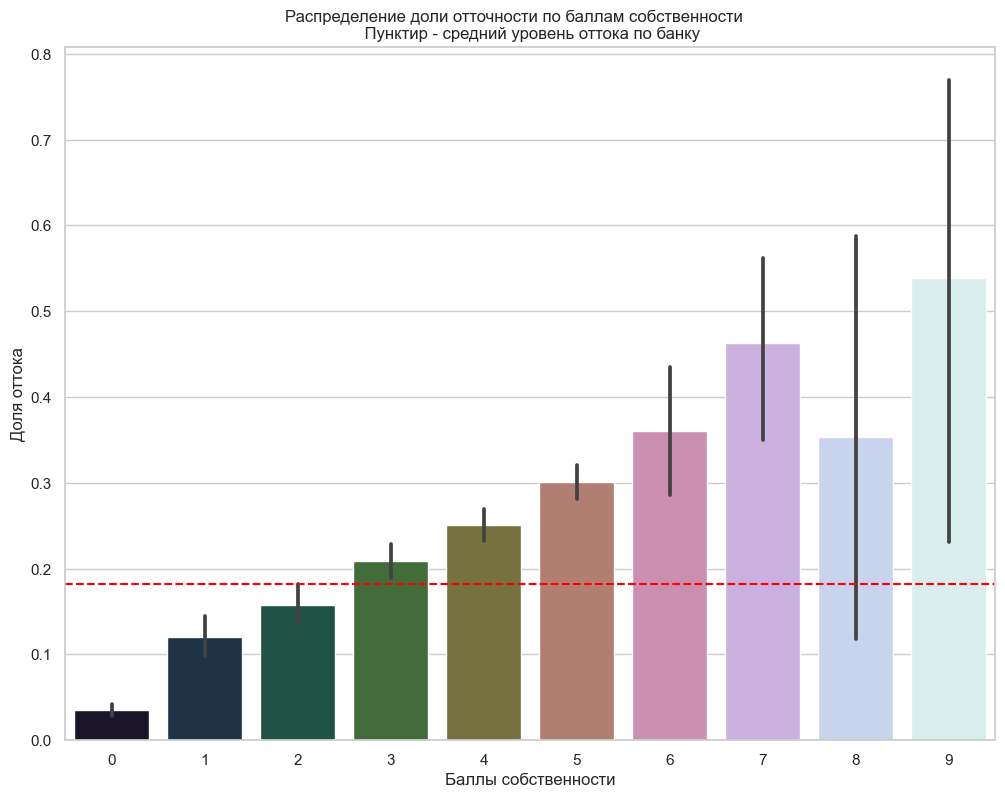

In [48]:
ax = sns.barplot(data=df, 
                 x="equity", 
                 y="churn", 
                 palette="cubehelix")
ax.axhline(y=df['churn'].mean(), color='red', linestyle='--')
ax.set(xlabel='Баллы собственности', ylabel='Доля оттока', 
       title='Распределение доли отточности по баллам собственности\
       \n Пунктир - средний уровень оттока по банку')
plt.show()

**Отличия в отточности по объектам в собственности очень заметные.** Ситуация с этой метрикой повторяет сложившуюся закономерность, чем более состоятельны клиенты - тем с большей активностью они начинают отваливаться. Среди клиентов с 1 баллом почти нет отточных клиентов, причем их самих у нас довольно много. От одного и до двух баллов включительно, неотточных клиентов несколько больше на фоне отточных, но после трех баллов и до самой крайней точки отточные клиенты начинают доминировать. 

### Недавняя активность EDA

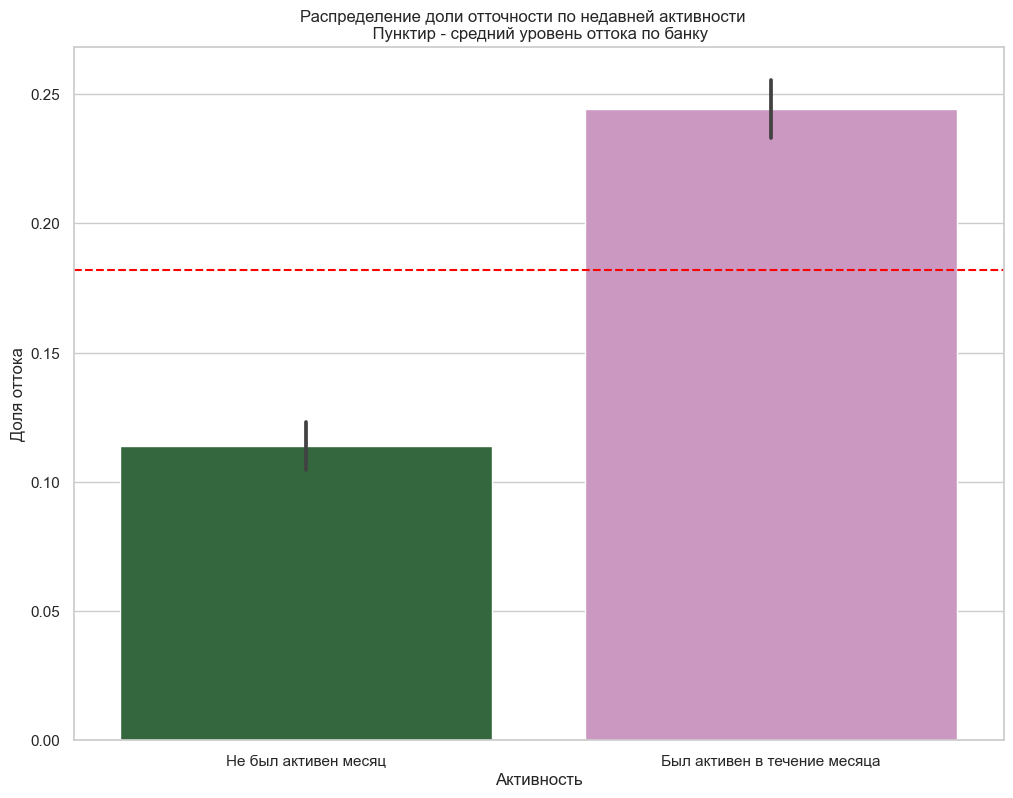

In [49]:
ax = sns.barplot(data=df, 
                 x="last_activity", 
                 y="churn", 
                 palette="cubehelix")
ax.axhline(y=df['churn'].mean(), color='red', linestyle='--')
ax.set(xlabel='Активность', ylabel='Доля оттока', 
       title='Распределение доли отточности по недавней активности\
       \n Пунктир - средний уровень оттока по банку')
plt.xticks([0, 1], ['Не был активен месяц', 'Был активен в течение месяца'])
plt.show()

На удивление, **среди активных клиентов заметно больше отточных, и наоборот.** Вполне возможно, в последнее время были какие-то проблемы с сервисами, что отпугнуло активных клиентов. Неактивные же в силу очевидных причин могли про данные проблемы просто не узнать. Имеет смысл уточнить эту ситуации в поддержке, не было ли специфической активности в плане обращений туда.

### Возраст EDA

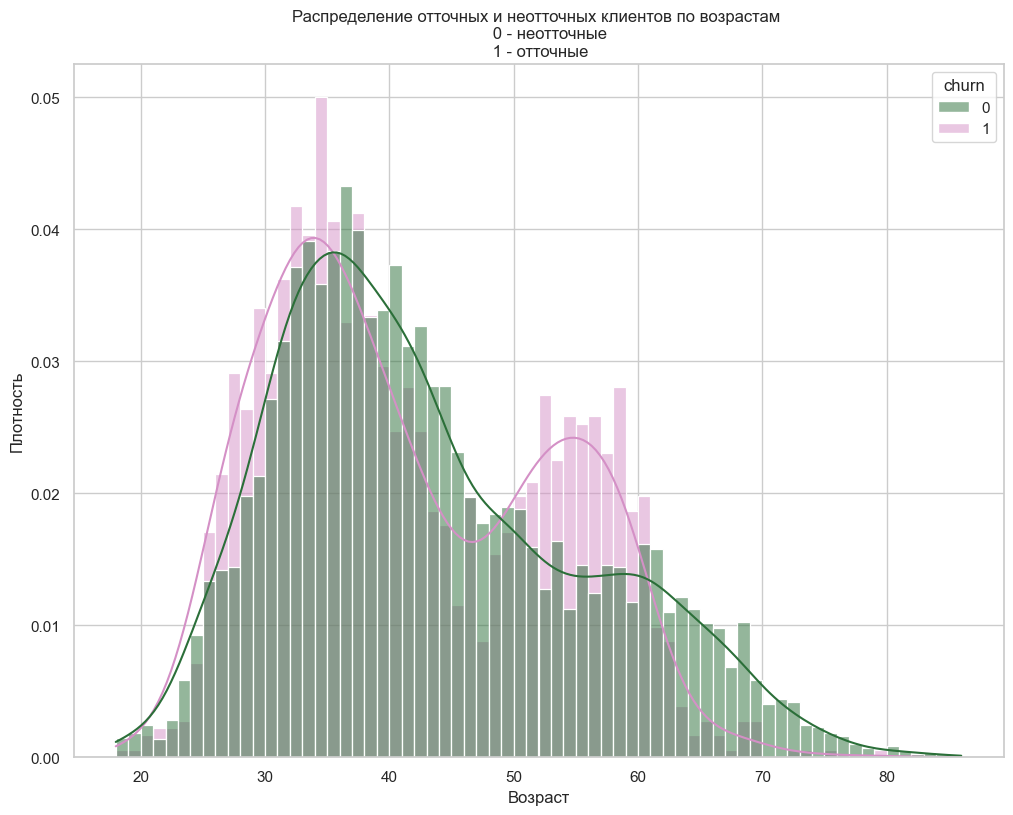

In [50]:
ax = sns.histplot(
    df, 
    x="age", 
    hue="churn",
    stat="density", 
    common_norm=False, 
    palette="cubehelix", 
    kde=True, 
    bins=len(df['age'].unique()));

ax.set(xlabel='Возраст', ylabel='Плотность', 
       title='Распределение отточных и неотточных клиентов по возрастам \n      0 - неотточные \n 1 - отточные')
plt.show()

In [51]:
print('Медиана возрастов для отточных клиентов: {:.0f}'
      .format(df.query('churn == 1')['age'].median()))
print('Медиана возрастов для неотточных клиентов: {:.0f}'
      .format(df.query('churn == 0')['age'].median()))

Медиана возрастов для отточных клиентов: 39
Медиана возрастов для неотточных клиентов: 40


Разница между медианами возрастов почти незаметна, но по графикам видны некоторые тенденции. **Среди возрастов 35-50 и старше 60 заметна большая выраженность неотточных клиентов.**

### Города EDA

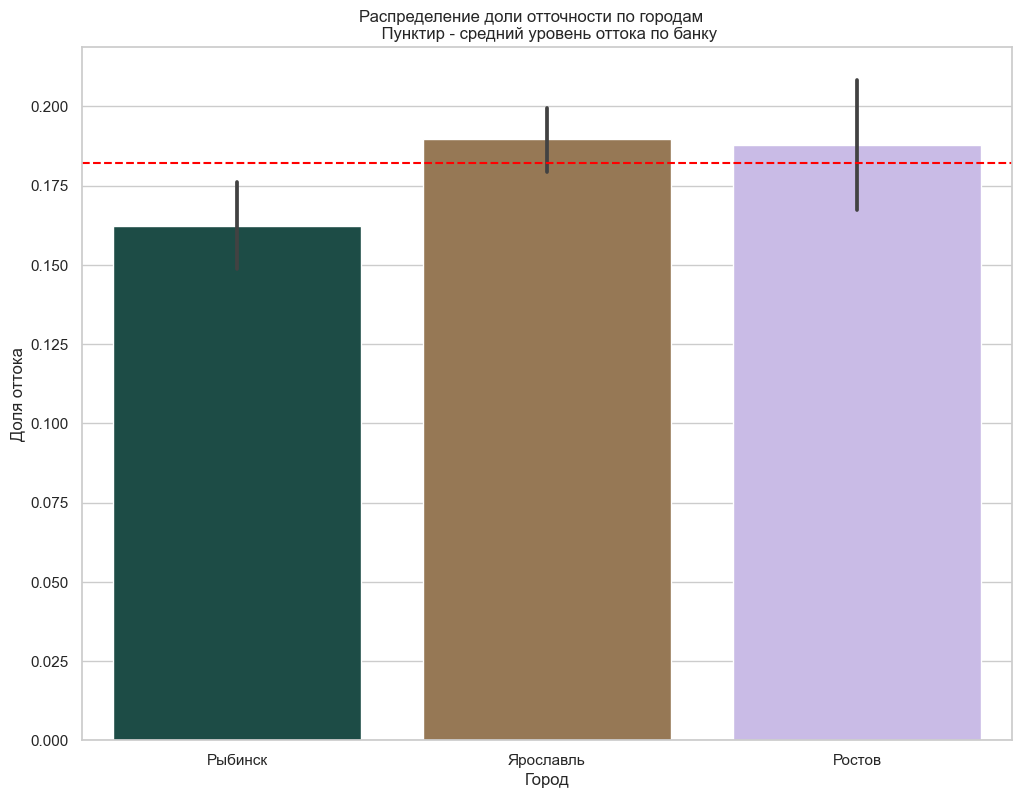

In [52]:
ax = sns.barplot(data=df, 
                 x="city", 
                 y="churn", 
                 palette="cubehelix")
ax.axhline(y=df['churn'].mean(), color='red', linestyle='--')
ax.set(xlabel='Город', ylabel='Доля оттока', 
       title='Распределение доли отточности по городам\
       \n Пунктир - средний уровень оттока по банку')
plt.show()

Рыбинск стал городом, в котором клиенты менее отточны на фоне среднего по банку, но разница довольно низка.

### Пол EDA

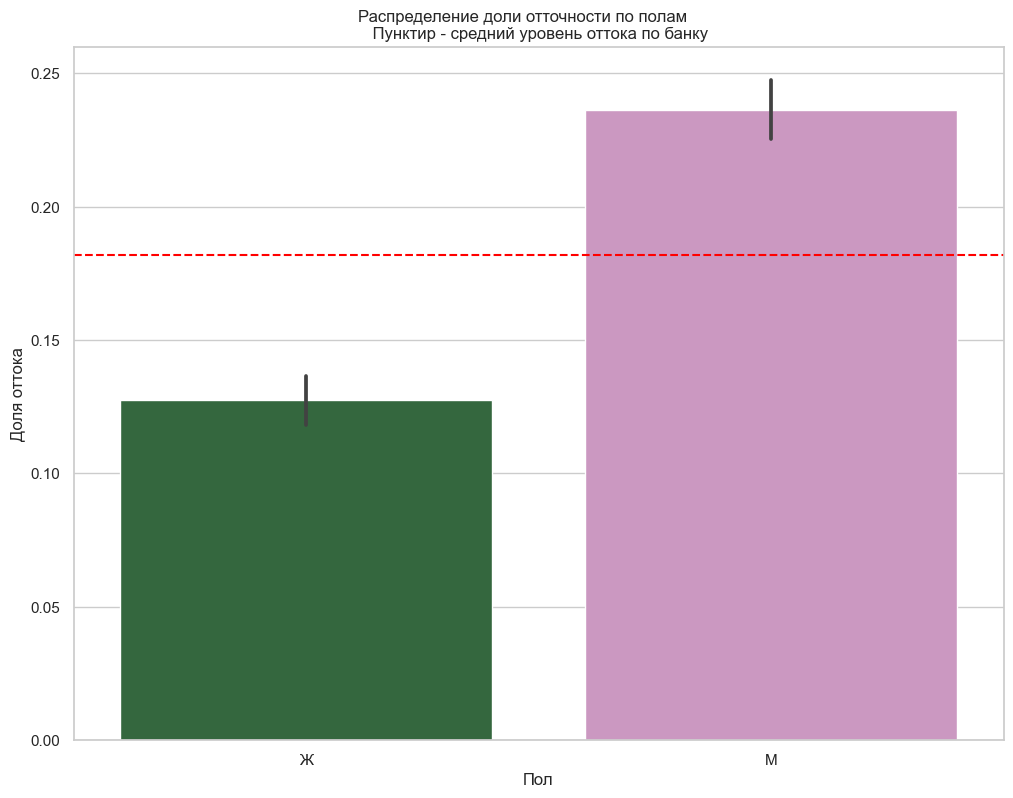

In [53]:
ax = sns.barplot(data=df, 
                 x="gender", 
                 y="churn", 
                 palette="cubehelix")
ax.axhline(y=df['churn'].mean(), color='red', linestyle='--')
ax.set(xlabel='Пол', ylabel='Доля оттока', 
       title='Распределение доли отточности по полам\
       \n Пунктир - средний уровень оттока по банку')
plt.show()

**Между полами в плане отточности есть заметные различия.** Неотточных клиенток чуть менее чем вполовину больше, относительно отточных. В то же время, среди мужчин, отточных клиентов больше, на фоне неотточных, хоть и разница несколько менее выражена на фоне женщин и составляет чуть меньше трети. 

### Итог EDA

Между группами отточных и неотточных клиентов наблюдаются сильные различия. Основное, что можно заметить на графиках - бОльшая отточность свойственна более состоятельным клиентам. С ростом состоятельности, будь то баланс, баллы кредитного скора или баллы собственности, клиенты начинают все активнее и активнее отваливаться. И наоборот, среди клиентов с состоятельностью ниже средней лояльность находится на высоком уровне. 

Если говорить про точные цифры, то для лояльных клиентов характерны следующие показатели:
- Баланс до 1.2млн
- Приблизительная ЗП до 100к
- Кредитный скор менее 800
- Один подключенный продукт
- Наличие кредитки
- Два и менее балла собственности
- Отсутствие недавней активности
- Возраст между 35 и 50 годами, либо старше 60-и
- Женщины в среднем более лояльны

## Гипотезы

In [54]:
# за альфу примем 5%
alpha = 0.05
alpha = round(alpha / 2, 3) # поправка бонферрони на 2 теста
alpha

0.025

In [55]:
def stat_test_1(metric):
    '''Функция делает стат.тесты по Манну-Уитни и Стюденту. 
    А также сравнивает средние указанной метрики между собой'''
    leaving = df.query('churn == 1') # отточные клиенты, переменная для наглядности
    staying = df.query('churn == 0') # неотточные клиенты
    
    results = st.mannwhitneyu(leaving[metric], staying[metric])

    print('Проверка U-критерием: ')
    print('---')  
    print(f'alpha:   {alpha}')
    print("p-value: {:.5f}".format(results.pvalue))
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
        ) 
    print('-------------------------------------------------')
    print('Проверка t-критерием:')
    print('---')
    print(f'alpha:               {alpha}')
    print("p-value:             {:.5f}".format(st.ttest_ind(leaving[metric], staying[metric], equal_var=False)[1]))
    print("Статистика разности: {:.5f}".format(st.ttest_ind(leaving[metric], staying[metric], equal_var=False)[0]))


    if st.ttest_ind(leaving[metric], staying[metric], equal_var=False)[1] < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
        ) 
    print('-------------------------------------------------')  
    print('Среднее для метрики по отточным клиентам: {:.2f}'.format(leaving[metric].mean()))
    print('Среднее для метрики по НЕотточным клиентам: {:.2f}'.format(staying[metric].mean()))
    print("Различие между средними: {:.1%}".format(
        leaving[metric].mean() / staying[metric].mean() -1))

### Проверка приблизительной ЗП

In [56]:
print('Гипотеза о равенстве приблизительной ЗП между группами по отточности:')
print()
stat_test_1('est_salary')

Гипотеза о равенстве приблизительной ЗП между группами по отточности:

Проверка U-критерием: 
---
alpha:   0.025
p-value: 0.00024
Отвергаем нулевую гипотезу: разница статистически значима
-------------------------------------------------
Проверка t-критерием:
---
alpha:               0.025
p-value:             0.88871
Статистика разности: 0.13995
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
-------------------------------------------------
Среднее для метрики по отточным клиентам: 148243.01
Среднее для метрики по НЕотточным клиентам: 147783.20
Различие между средними: 0.3%


**Приблизительная ЗП**
Тесты показали совершенно разные результаты. 
Будем ориентироваться на  t-критерий. p-value очень высок и посему нулевую гипотезу отвергнуть не получилось, использование приблизительной ЗП для сегментирования было бы некорректным. 

In [57]:
df['est_salary'].kurt()

22.21691296403218

In [58]:
df['est_salary'].skew()

4.0965290116112465

In [59]:
# вероятно, выборка не распределена нормально
st.shapiro(df['est_salary'])

C:\Users\khuss\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6189883947372437, pvalue=0.0)

In [60]:
# сомнений нет, но критерий Колмогорова-Смирнова сугубо для галочки
# т.к. у него нет ограничений по длине выборки
st.kstest(df['est_salary'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

По обоим тестам p-value нулевой - **крайне маловероятно, что зарплаты распределены нормально.** 

Эксцесс очень высокий, что вполне заметно на графике - он очень острый и сигмы относительно мелкие на фоне широты показателей выборки. 
Асимметрия положительная, что также было вполне видно на распределении - правый хвост заметно длиннее левого.


### Проверка возрастов

In [61]:
print('Гипотеза о равенстве среднего возраста между группами по отточности:')
print()
stat_test_1('age')

Гипотеза о равенстве среднего возраста между группами по отточности:

Проверка U-критерием: 
---
alpha:   0.025
p-value: 0.00000
Отвергаем нулевую гипотезу: разница статистически значима
-------------------------------------------------
Проверка t-критерием:
---
alpha:               0.025
p-value:             0.00000
Статистика разности: -5.28819
Отвергаем нулевую гипотезу: разница статистически значима
-------------------------------------------------
Среднее для метрики по отточным клиентам: 41.45
Среднее для метрики по НЕотточным клиентам: 43.01
Различие между средними: -3.6%


**Возраста:**

Обе проверки показали одинаковые результаты, p-value очень низкий, разница между возрастами в группах существенна, что вполне показывали графики, статистический тест лишь подтвердил ожидаемый итог.

## Сегментация

In [62]:
def portrait_of_group(group):
    '''
    Показывает средние параметры группы и дает оценку ценности. 
    Оценка происходит по формуле: доля баланса * доля продутов * доля кредиток
    '''
    _ = (group['balance'].median() / df['balance'].median())\
     *(group['products'].mean() / df['products'].mean())\
     *(group['credit_card'].mean() / df['credit_card'].mean())
    
    print('Размер группы: {}'.format(len(group)))
    print('Отток сегмента: {:.3f}'.format(group['churn'].mean()))
    print('Ценность сегмента относительно среднего по банку: {:.3f}'.format(_))
    print('===============')
    print('Генеральный баланс: {:.0f}, баланс группы: {:.0f}'.format(
        df['balance'].median(), group['balance'].median()))
    print('Отличие по балансу от всех данных: {:.5f}'.format(
        group['balance'].median() / df['balance'].median()))
    print('---')
    print('Генеральная медиана ЗП: {:.0f}, ЗП группы: {:.0f}'.format(
        df['est_salary'].median(), group['est_salary'].median()))
    print('Отличие по ЗП от всех данных: {:.5f}'.format(
        group['est_salary'].median() / df['est_salary'].median()))
    print('---')
    print('Генеральное среднее продуктов: {:.2f}, продукты группы: {:.2f}'.format(
        df['products'].mean(), group['products'].mean()))
    print('Генеральная доля кредиток: {:.1%}, кредитки в группе: {:.1%}'.format(
        df['credit_card'].mean(), group['credit_card'].mean()))
    print('Среднее кредитного скора: {:.0f}, скор группы: {:.0f}'.format(
        df['score'].mean(), group['score'].mean()))
    print('Средние баллы собственности: {:.3f}, баллы группы: {:.3f}'.format(
        df['equity'].mean(), group['equity'].mean())) 
    print('Средний возраст: {:.0f}, возраст группы: {:.0f}'.format(
        df['age'].mean(), group['age'].mean()))
    

In [63]:
print('Показатели основного датафрейма')
print()
portrait_of_group(df)

Показатели основного датафрейма

Размер группы: 10000
Отток сегмента: 0.182
Ценность сегмента относительно среднего по банку: 1.000
Генеральный баланс: 594823, баланс группы: 594823
Отличие по балансу от всех данных: 1.00000
---
Генеральная медиана ЗП: 119658, ЗП группы: 119658
Отличие по ЗП от всех данных: 1.00000
---
Генеральное среднее продуктов: 1.87, продукты группы: 1.87
Генеральная доля кредиток: 68.0%, кредитки в группе: 68.0%
Среднее кредитного скора: 849, скор группы: 849
Средние баллы собственности: 2.628, баллы группы: 2.628
Средний возраст: 43, возраст группы: 43


### Сегмент A

In [64]:
# клиенты среднего возраста с низким балансом и малыми балами собственности
aseg = df.query("(35 <= age <= 50) and balance <= 1_200_000 and equity <= 2")

print('Показатели группы А')
print()
portrait_of_group(aseg)

Показатели группы А

Размер группы: 1725
Отток сегмента: 0.066
Ценность сегмента относительно среднего по банку: 0.763
Генеральный баланс: 594823, баланс группы: 489702
Отличие по балансу от всех данных: 0.82327
---
Генеральная медиана ЗП: 119658, ЗП группы: 157306
Отличие по ЗП от всех данных: 1.31463
---
Генеральное среднее продуктов: 1.87, продукты группы: 1.54
Генеральная доля кредиток: 68.0%, кредитки в группе: 76.7%
Среднее кредитного скора: 849, скор группы: 841
Средние баллы собственности: 2.628, баллы группы: 0.672
Средний возраст: 43, возраст группы: 41


### Сегмент B

In [65]:
# малоактивные пожилые клиенты
bseg = df.query("age >= 60 and last_activity == 0")

print('Показатели группы B')
print()
portrait_of_group(bseg)

Показатели группы B

Размер группы: 529
Отток сегмента: 0.078
Ценность сегмента относительно среднего по банку: 0.895
Генеральный баланс: 594823, баланс группы: 592481
Отличие по балансу от всех данных: 0.99606
---
Генеральная медиана ЗП: 119658, ЗП группы: 70863
Отличие по ЗП от всех данных: 0.59222
---
Генеральное среднее продуктов: 1.87, продукты группы: 1.90
Генеральная доля кредиток: 68.0%, кредитки в группе: 60.1%
Среднее кредитного скора: 849, скор группы: 852
Средние баллы собственности: 2.628, баллы группы: 2.741
Средний возраст: 43, возраст группы: 65


### Сегмент C

In [66]:
# женщины с кредиткой и низким кредитным скором
cseg = df.query("gender == 'Ж' and credit_card == 1 and score <= 820")

print('Показатели группы C')
print()
portrait_of_group(cseg)

Показатели группы C

Размер группы: 1129
Отток сегмента: 0.058
Ценность сегмента относительно среднего по банку: 1.010
Генеральный баланс: 594823, баланс группы: 447273
Отличие по балансу от всех данных: 0.75194
---
Генеральная медиана ЗП: 119658, ЗП группы: 102518
Отличие по ЗП от всех данных: 0.85675
---
Генеральное среднее продуктов: 1.87, продукты группы: 1.71
Генеральная доля кредиток: 68.0%, кредитки в группе: 100.0%
Среднее кредитного скора: 849, скор группы: 772
Средние баллы собственности: 2.628, баллы группы: 2.198
Средний возраст: 43, возраст группы: 45


### Сегмент D

In [67]:
# малоактивные клиенты с одним продуктом
dseg = df.query("products == 1 and last_activity == 0")

print('Показатели группы D')
print()
portrait_of_group(dseg)

Показатели группы D

Размер группы: 1576
Отток сегмента: 0.051
Ценность сегмента относительно среднего по банку: 0.716
Генеральный баланс: 594823, баланс группы: 618907
Отличие по балансу от всех данных: 1.04049
---
Генеральная медиана ЗП: 119658, ЗП группы: 140199
Отличие по ЗП от всех данных: 1.17166
---
Генеральное среднее продуктов: 1.87, продукты группы: 1.00
Генеральная доля кредиток: 68.0%, кредитки в группе: 87.5%
Среднее кредитного скора: 849, скор группы: 857
Средние баллы собственности: 2.628, баллы группы: 1.437
Средний возраст: 43, возраст группы: 42


**Сегментация:**
Сегментация помогла существенно изменить пропорцию отточных и неотточных клиентов. На основании определенных диапазонов метрик можно более точно таргетировать воздействие на клиентов.

Наименьшую отточность показали следующие участки метрик:
- age 35-50 и 60+
- equity 0-2 
- products 1
- score 650-820
- balance до 1_200_000
- credit_card 1
- last_activity 0

С учетом того, что средний уровень оттока по банку составил **~ 18.2%**, рассмотрим получившиеся группы: 

- **Группа A** составила 1725 человек, уровень оттока **6.6%**, ценность **76%**. Она состоит из людей среднего возраста(35-50), с невысоким балансом(<1.2m), а также низкими баллами собственности(<=2).
 - В силу низких баллов собственности, можно предположить что у них достаточно скромная недвижимость. Вероятно, они могут быть заинтересованы в покупке квартир для детей или просто увеличения собственной жилплощади. В силу этого, неплохо подойдут предложения ипотек по льготным условиям, или возможность покупки недвижимости с меньшим первоночальным взносом. В целом, подойдут любые стимулирующие средства в этом направлении.
- **Группа B** составила 529 человек, уровень оттока **7.8%**, ценность **90%**. Это группа пожилых(60+) малоактивных людей.
 - Этой группе может понравиться, если с ними будут ежемесячно связываться консультанты и информировать их о предложениях банка и т.п. В среднем, люди в этом возрасте на текущий момент редко пользуются приложениями, так что общение с живым человеком может стать для них привлекательной опцией при выборе банка.
- **Группа C** составила 1129 человек, уровень оттока **5.8%**, ценность **100%**. Группа состоит из женщин с криткой, но низким кредитным скором.
 - Вполне возможно, неплохим вариантом будут кредитные карты с повышенным кэшбэком для покупок FMCG. Низкий кредитный скор намекает на не слишком высокий достаток, так что подобные стимулы могут быть интересной опцией.
- **Группа D** составила 1576 человек, уровень оттока **5.1%**, ценность **72%**. Группа малоактивных клиентов лишь с одним продуктом.
 - Этой группе понравятся скидки на подключение первого продукта или льготный период по пониженным ставкам за подключение первого продукта. 

## Итог

**Пропуски:**

По всей видимости, пропуски в данных не были случайны, ибо прослеживается сильная корреляция наличия пропусков, а также нескольких метрик, в частности баллов собственности(equity), где корреляция составила 71%. Причем, если рассмотреть распределение по баллам объектов в собственности подробнее, видно, что почти все пропуски сконцентрированы на 0 баллов. Хоть и при этом для клиентов с пропусками в балансе характерны более высокие показатели приблизительной ЗП, что несколько контрастирует с нулевыми баллами equity.

Все это подводит к мысли, что пропуски в балансе вызваны каким-то багом выгрузки и прямо коррелируют с метрикой equity, подавляющее большинство пропусков у клиентов с нулем баллов equity. 

Но также, это заставляет предположить, что нули в equity являются результатом некой ошибки.

**Отточность:**

Между группами отточных и неотточных клиентов наблюдаются сильные различия. Основное, что можно заметить на графиках - бОльшая отточность свойственна более состоятельным клиентам. С ростом состоятельности, будь то баланс, баллы кредитного скора или баллы собственности, клиенты начинают все активнее и активнее отваливаться. И наоборот, среди клиентов с состоятельностью ниже средней лояльность находится на высоком уровне. 

Если говорить про точные цифры, то для лояльных клиентов характерны следующие показатели:
- Баланс до 1.2млн
- Кредитный скор менее 820
- Один подключенный продукт
- Наличие кредитки
- Два и менее балла собственности
- Отсутствие недавней активности
- Возраст между 35 и 50 годами, либо старше 60-и
- Женщины в среднем более лояльны

**Сегменты и рекомендации по ним:**

С учетом того, что средний уровень оттока по банку составил **~ 18.2%**, рассмотрим получившиеся группы: 

- **Группа A** составила 1725 человек, уровень оттока **6.6%**, ценность **76%**. Она состоит из людей среднего возраста(35-50), с невысоким балансом, а также низкими баллами собственности.
 - В силу низких баллов собственности, можно предположить что у них достаточно скромная недвижимость. Вероятно, они могут быть заинтересованы в покупке квартир для детей или просто увеличения собственной жилплощади. В силу этого, неплохо подойдут предложения ипотек по льготным условиям, или возможность покупки недвижимости с меньшим первоночальным взносом. В целом, подойдут любые стимулирующие средства в этом направлении.
- **Группа B** составила 529 человек, уровень оттока **7.8%**, ценность **90%**. Это группа пожилых(60+) малоактивных людей.
 - Этой группе может понравиться, если с ними будут ежемесячно связываться консультанты и информировать их о предложениях банка и т.п. В среднем, люди в этом возрасте на текущий момент редко пользуются приложениями, так что общение с живым человеком может стать для них привлекательной опцией при выборе банка.
- **Группа C** составила 1129 человек, уровень оттока **5.8%**, ценность **100%**. Группа состоит из женщин с кредиткой, но низким кредитным скором.
 - Вполне возможно, неплохим вариантом будут кредитные карты с повышенным кэшбэком для покупок FMCG. Низкий кредитный скор намекает на не слишком высокий достаток, так что подобные стимулы могут быть интересной опцией.
- **Группа D** составила 1576 человек, уровень оттока **5.1%**, ценность **72%**. Группа малоактивных клиентов лишь с одним продуктом.
 - Этой группе понравятся скидки на подключение первого продукта или льготный период по пониженным ставкам за подключение первого продукта. 
 
**Общие рекомендации:**
1) Судя по показателям отточности, у банка могли быть какие-то недавние серьезные проблемы с сервисами в ближайшем месяце, ибо среди активных клиентов отточность заметно выше. Вполне возможно, малоактивные клиенты просто не столкнулись с этими проблемами, посему и остались лояльными. Имеет смысл пообщаться с клиентской поддержкой, выяснить насчет этого.

2) Видно, что чем более состоятельный клиент - тем с меньшим желанием он хочет с нами оставаться. Даже есть такая специфика диктуется выбором нашей целевой аудитории, у нас достаточно обеспеченных клиентов. Падение привлекательности очень заметно по балансу клиентов, где после одного миллиона идет резкий провал лояльности. Вполне возможно, состоятельным клиента не хватает специфических услуг или продуктов. Имеет смысл провести опрос среди таких клиентов, узнать, что бы они хотели видеть у нас и чего не получают.

3) До тех пор пока мы ничего не сделали в плане повышения лояльности состоятельных клиентов, следует концентрировать усилия на клиентов с состоятельностью ниже среднего. В среднем, они показывают очень хорошие показатели лояльности, характерна тенденция, что чем менее состоятельный клиент - тем менее он склонен становиться отточным.